In [1]:
import pandas as pd
import numpy as np

file = "data/BASE DE DATOS PCC.xlsx"
df = pd.read_excel(file)
df.head(10)


,Pedido,OP,Referencia,Maquina,Sección,Proceso,Usuario,Estado,Fabricadas,Fecha inicio,Fecha fin,Duración,Duración [min],Ayudante,Info. Extra 1
0,25301,6362,PT-0000001709,AMECPEGACA - Pegadora de Cajas Signature,Pegadora de Cajas,Pegar,dcardona,PLAY,12000,2024-01-28 12:07:29,2024-01-28 12:35:45,00:28:16,28.27,No,NaN
1,25301,6362,PT-0000001709,AMECPEGACA - Pegadora de Cajas Signature,Pegadora de Cajas,cambiorefe,dcardona,STOP,0,2024-01-28 11:49:01,2024-01-28 12:07:29,00:18:28,18.47,No,NaN
2,26146,7258,PT-0000000197,AMECPEGACA - Pegadora de Cajas Signature,Pegadora de Cajas,Pegar,dcardona,PLAY,28000,2024-01-29 07:29:18,2024-01-29 08:18:30,00:49:12,49.20,No,NaN
3,26146,7258,PT-0000000197,AMECPEGACA - Pegadora de Cajas Signature,Pegadora de Cajas,cambiorefe,dcardona,STOP,0,2024-01-29 06:53:59,2024-01-29 07:29:18,00:35:19,35.32,No,NaN
4,26550,7685,PT-0000001846,MAQSPEED - Maquina Speed master pliego 6,Prensa,Imprimir,jhenao,PLAY,24660,2023-08-24 00:15:33,2023-08-24 00:49:30,00:33:57,33.95,No,6.0
5,26550,7685,PT-0000001846,MAQSPEED - Maquina Speed master pliego 6,Prensa,cambiorefe,jhenao,STOP,0,2023-08-24 00:11:56,2023-08-24 00:15:33,00:03:37,3.62,No,6.0
6,26589,7725,PT-0000000616,MAQSPEED - Maquina Speed master pliego 6,Prensa,Imprimir,cpiedrahit,PLAY,4200,2023-08-28 00:31:58,2023-08-28 01:01:06,00:29:08,29.13,No,2.0
7,26589,7725,PT-0000000616,MAQSPEED - Maquina Speed master pliego 6,Prensa,Imprimir,cpiedrahit,PLAY,3320,2023-08-28 01:56:18,2023-08-28 02:28:50,00:32:32,32.53,No,2.0
8,26589,7725,PT-0000000616,MAQSPEED - Maquina Speed master pliego 6,Prensa,cambiorefe,cpiedrahit,STOP,0,2023-08-27 22:41:15,2023-08-27 23:59:59,01:18:44,78.73,No,2.0
9,26589,7725,PT-0000000616,MAQSPEED - Maquina Speed master pliego 6,Prensa,cambiorefe,cpiedrahit,STOP,0,2023-08-28 00:00:00,2023-08-28 00:18:40,00:18:40,18.67,No,2.0


In [2]:
# Información general
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23651 entries, 0 to 23650
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Pedido          23651 non-null  int64  
 1   OP              23651 non-null  int64  
 2   Referencia      23651 non-null  object 
 3   Maquina         23651 non-null  object 
 4   Sección         23651 non-null  object 
 5   Proceso         23651 non-null  object 
 6   Usuario         23651 non-null  object 
 7   Estado          23651 non-null  object 
 8   Fabricadas      23651 non-null  object 
 9   Fecha inicio    23651 non-null  object 
 10  Fecha fin       23651 non-null  object 
 11  Duración        23651 non-null  object 
 12  Duración [min]  23649 non-null  float64
 13  Ayudante        23651 non-null  object 
 14  Info. Extra 1   23590 non-null  float64
dtypes: float64(2), int64(2), object(11)
memory usage: 2.7+ MB


In [3]:
# Estadísticas básicas
df.describe(include='all').style.background_gradient(cmap = "plasma")

,Pedido,OP,Referencia,Maquina,Sección,Proceso,Usuario,Estado,Fabricadas,Fecha inicio,Fecha fin,Duración,Duración [min],Ayudante,Info. Extra 1
count,23651.000000,23651.000000,23651,23651,23651,23651,23651,23651,23651.000000,23651,23651,23651,23649.000000,23651,23590.000000
unique,nan,nan,842,13,3,17,34,2,3820.000000,23131,23125,9062,nan,1,nan
top,nan,nan,PT-0000001912,MAQSPEED - Maquina Speed master pliego 6,Prensa,cambiorefe,mmartinez,PLAY,0.000000,2024-10-31 00:00:00,2024-10-08 23:59:59,00:00:08,nan,No,nan
freq,nan,nan,660,5505,11154,9619,1389,13851,13235.000000,5,5,52,nan,23651,nan
mean,29108.328189,10384.506025,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,63.043219,nan,11.435566
std,852.693763,867.892852,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,57.925490,nan,13.725752
min,25301.000000,6362.000000,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,0.070000,nan,1.000000
25%,28492.000000,9772.000000,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,21.950000,nan,4.000000
50%,29158.000000,10445.000000,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,45.280000,nan,6.000000
75%,29791.500000,11081.000000,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,85.630000,nan,16.000000


In [4]:
import unidecode
# Eliminar acentos
df.columns = [unidecode.unidecode(col) for col in df.columns]
# Quitar espacios y estandarizar nombres de columnas
df.columns = df.columns.str.strip().str.lower().str.replace(' ', '_')
df.columns = df.columns.str.strip().str.lower().str.replace('.', '')
df.columns = df.columns.str.strip().str.lower().str.replace('[', '')
df.columns = df.columns.str.strip().str.lower().str.replace(']', '')
print(df.columns)

Index(['pedido', 'op', 'referencia', 'maquina', 'seccion', 'proceso',
       'usuario', 'estado', 'fabricadas', 'fecha_inicio', 'fecha_fin',
       'duracion', 'duracion_min', 'ayudante', 'info_extra_1'],
      dtype='object')


In [5]:
# Valores nulos
print(df.isnull().sum())

# Registros duplicados
print(f"Duplicados: {df.duplicated().sum()}")

pedido           0
op               0
referencia       0
maquina          0
seccion          0
proceso          0
usuario          0
estado           0
fabricadas       0
fecha_inicio     0
fecha_fin        0
duracion         0
duracion_min     2
ayudante         0
info_extra_1    61
dtype: int64
Duplicados: 0


In [6]:
#Verificar por posibles variantes sin variacion
single_unique = df.nunique()
single_unique

pedido           3092
op               3128
referencia        842
maquina            13
seccion             3
proceso            17
usuario            34
estado              2
fabricadas       3820
fecha_inicio    23131
fecha_fin       23125
duracion         9062
duracion_min     9117
ayudante            1
info_extra_1       42
dtype: int64

In [7]:
# Cambiar el tipo de variable de fabricadas
df['fabricadas'] = pd.to_numeric(df['fabricadas'], errors='coerce')
# Tipo de variable datetime
df['fecha_inicio'] = pd.to_datetime(df['fecha_inicio'], format='%Y-%m-%d %H:%M:%S', errors='coerce')
df['fecha_fin'] = pd.to_datetime(df['fecha_fin'], format='%Y-%m-%d %H:%M:%S', errors='coerce')

In [8]:
# Variables de fecha adicionales
df['dia_inicio'] = df['fecha_inicio'].dt.date
df['hora_inicio'] = df['fecha_inicio'].dt.hour
df['dia_semana_inicio'] = df['fecha_inicio'].dt.day_name()

In [9]:
df['dia_fin'] = df['fecha_fin'].dt.date
df['hora_fin'] = df['fecha_fin'].dt.hour
df['dia_semana_fin'] = df['fecha_fin'].dt.day_name()

In [10]:
df['duracion'] = pd.to_timedelta(df['duracion'])
df['duracion'] = df['duracion'].dt.total_seconds()
#Cambiar nombre de la columna
df.rename(columns={'duracion': 'duracion_sec'}, inplace=True)

In [11]:
errores = df[df['fecha_fin'] < df['fecha_inicio']]
print(f"Registros con fechas invertidas: {len(errores)}")

Registros con fechas invertidas: 0


In [12]:
#Eliminar columnas innecesarias
df.drop(columns=['ayudante','info_extra_1'], inplace=True)

df['estado'] = df['estado'].str.strip().str.lower()
#Eliminar filas con estado "play" sin produccion o producción NAN (errores de digitacion)
df = df[~((df['estado'] == 'play') & (df['fabricadas'] == 0))]
df = df[~df['fabricadas'].isna()]
# Llenar valor nulos de duracion_minutos con el calculo de la diferencia entre fecha_inicio y fecha_fin
# Calcular diferencia en minutos
diferencia_min = (df['fecha_fin'] - df['fecha_inicio']).dt.total_seconds() / 60

# Solo llenar valores faltantes
df['duracion_min'] = df['duracion_min'].fillna(diferencia_min)

In [13]:
# Valores nulos
print(df.isnull().sum())
print("*"*50)
# Registros duplicados
print(f"Duplicados: {df.duplicated().sum()}")
print("*"*50)
#Verificar por posibles variantes sin variacion
single_unique = df.nunique()
print(single_unique)

pedido               0
op                   0
referencia           0
maquina              0
seccion              0
proceso              0
usuario              0
estado               0
fabricadas           0
fecha_inicio         0
fecha_fin            0
duracion_sec         0
duracion_min         0
dia_inicio           0
hora_inicio          0
dia_semana_inicio    0
dia_fin              0
hora_fin             0
dia_semana_fin       0
dtype: int64
**************************************************
Duplicados: 0
**************************************************
pedido                3092
op                    3128
referencia             842
maquina                 12
seccion                  3
proceso                 17
usuario                 31
estado                   2
fabricadas            3819
fecha_inicio         19832
fecha_fin            20063
duracion_sec          8350
duracion_min          8401
dia_inicio             486
hora_inicio             24
dia_semana_inicio        7
di

In [20]:
df.describe()

,pedido,op,fabricadas,fecha_inicio,fecha_fin,duracion_sec,duracion_min,hora_inicio,hora_fin
count,20215.000000,20215.000000,2.021500e+04,20215,20215,20215.000000,20215.000000,20215.000000,20215.000000
mean,29113.227158,10389.684047,2.711615e+04,2024-05-27 22:29:44.921097984,2024-05-27 23:31:39.705862144,3701.615286,61.693641,10.905070,11.859906
min,25301.000000,6362.000000,0.000000e+00,2023-08-01 00:05:53,2023-08-01 00:36:01,4.000000,0.070000,0.000000,0.000000
25%,28503.000000,9781.000000,0.000000e+00,2024-02-22 09:16:54,2024-02-22 09:56:05,1306.500000,21.775000,6.000000,7.000000
50%,29161.000000,10447.000000,1.116000e+03,2024-06-05 00:00:00,2024-06-05 00:15:10,2645.000000,44.080000,11.000000,12.000000
75%,29792.000000,11081.000000,2.350000e+04,2024-09-16 17:48:16,2024-09-16 18:12:48.500000,4969.500000,82.825000,16.000000,17.000000
max,30623.000000,11899.000000,4.430100e+06,2024-12-24 09:24:00,2024-12-24 10:47:49,29969.000000,499.480000,23.000000,23.000000
std,847.890957,862.743440,7.957698e+04,NaN,NaN,3432.826501,57.213728,6.422051,6.437218


In [14]:
#Valores unicos en variables categóricas (HACER EN SQL)
# Sección, usuario, estado, máquina
print("Valores únicos por columna:")
for col in ['estado', 'usuario', 'seccion','maquina','proceso']:
    if col in df.columns:
        print(f"{col}: {df[col].unique()}")
        print(df[col].value_counts())
        print("-"*50)

Valores únicos por columna:
estado: ['play' 'stop']
estado
play    10415
stop     9800
Name: count, dtype: int64
--------------------------------------------------
usuario: ['dcardona' 'jhenao' 'cpiedrahit' 'mmartinez' 'falzate' 'acalderon'
 'hgranada' 'agomez' 'avalencia' 'jpatino' 'lmejia' 'jzapata' 'rvelasquez'
 'aflorez' 'lvelasquez' 'bortega' 'nserna' 'aherrera' 'jcacevedo'
 'jpalacio' 'jacevedo' 'cbarrientos' 'lechavarria' 'lsanchez' 'dgaviria'
 'rsuarez' 'ezapata' 'dmoreno' 'ksolorza' 'mquiroz' 'bsuarez']
usuario
mmartinez      1354
jcacevedo      1211
lvelasquez     1204
hgranada       1108
aflorez        1100
rvelasquez     1088
jacevedo       1077
cpiedrahit     1057
aherrera       1035
agomez         1024
dcardona       1002
falzate         935
jzapata         817
jhenao          794
bortega         789
nserna          753
jpatino         732
avalencia       729
acalderon       611
lmejia          510
jpalacio        481
dgaviria        200
dmoreno         185
cbarrientos   

In [17]:
# Calcular el porcentaje de registros por proceso y sección
conteo = df.groupby(['seccion','proceso' ]).size().reset_index(name='conteo')
conteo['porcentaje'] = 100 * conteo['conteo'] / len(df)
print(conteo)

              seccion                    proceso  conteo  porcentaje
0   Pegadora de Cajas                      Pegar    2371   11.728914
1   Pegadora de Cajas                 cambiorefe    2042   10.101410
2              Prensa                     1LAVAR      63    0.311650
3              Prensa                   Barnizar     234    1.157556
4              Prensa                Barnizar UV      20    0.098936
5              Prensa         Barnizar UV + Mate      22    0.108830
6              Prensa                   Imprimir    4098   20.272075
7              Prensa                 Imprimir 2     110    0.544150
8              Prensa  LEVANTAR LIMPIAR MANTILLA     118    0.583725
9              Prensa                 cambiorefe    4638   22.943359
10         Troquelado                    Brailer      90    0.445214
11         Troquelado                   Estampar       4    0.019787
12         Troquelado                     Grafar      30    0.148405
13         Troquelado             

In [18]:
# Calcular el porcentaje de registros por maquina y sección
conteo = df.groupby(['seccion','maquina' ]).size().reset_index(name='conteo')
conteo['porcentaje'] = 100 * conteo['conteo'] / len(df)
print(conteo)

              seccion                                    maquina  conteo  \
0   Pegadora de Cajas   AMECPEGACA - Pegadora de Cajas Signature    2183   
1   Pegadora de Cajas      AMECPEGACA2 - Pegadora de Cajas Nueva    2230   
2              Prensa                INDIGO5500 - Indigo Hp 5500     181   
3              Prensa  MAQBICOLR - Maquina Roland Bicolor pliego     416   
4              Prensa    MAQR700 - Maquina R700 6 color + barniz    4370   
5              Prensa   MAQSPEED - Maquina Speed master pliego 6    4336   
6          Troquelado   BANCOPREALISTAR1 - Bando de Prealistar 1       1   
7          Troquelado         BOBST102 - Troqueladora Bobst  102    3544   
8          Troquelado        BOBST1080 - Troqueladora Bobst 1080    2179   
9          Troquelado      NOVACUT106 - Troqueladora NovaCut 106      51   
10         Troquelado              TROQ1/2 - Troqueladora de 1/2     627   
11         Troquelado              TROQ1/4 - Troqueladora de 1/4      97   

    porcent

In [110]:
print("-"*50)
# Conteo general de estados
print(df['estado'].value_counts())
print("-"*50)
# Por usuario
print(df.groupby('usuario')['estado'].value_counts())
print("-"*50)
# Por sección
print(df.groupby('seccion')['estado'].value_counts())
print("-"*50)
# Por día
print("Dias de fabricación")
print("Inicio")
print(len(df.groupby('dia_inicio')['estado'].value_counts()))
print("Fin")
print(len(df.groupby('dia_fin')['estado'].value_counts()))
print("-"*50)

--------------------------------------------------
estado
play    10415
stop     9800
Name: count, dtype: int64
--------------------------------------------------
usuario      estado
acalderon    stop      336
             play      275
aflorez      play      624
             stop      476
agomez       stop      518
             play      506
aherrera     play      553
             stop      482
avalencia    stop      385
             play      344
bortega      play      424
             stop      365
bsuarez      play        2
cbarrientos  play      181
cpiedrahit   stop      578
             play      479
dcardona     play      532
             stop      470
dgaviria     play      107
             stop       93
dmoreno      stop      100
             play       85
ezapata      play        3
falzate      stop      582
             play      353
hgranada     stop      641
             play      467
jacevedo     stop      541
             play      536
jcacevedo    play      683
       

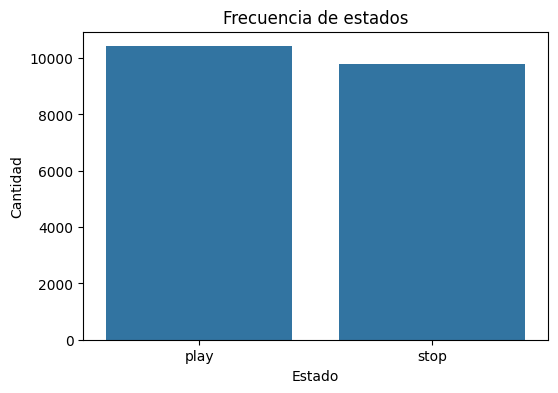

In [111]:
import seaborn as sns
import matplotlib.pyplot as plt

# Conteo simple
plt.figure(figsize=(6,4))
sns.countplot(data=df, x='estado', order=df['estado'].value_counts().index)
plt.title('Frecuencia de estados')
plt.xlabel('Estado')
plt.ylabel('Cantidad')
plt.show()

C:\Users\yosse\AppData\Local\Temp\ipykernel_9368\3059294993.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=duracion_usuario.values, y=duracion_usuario.index, palette='Blues_d')


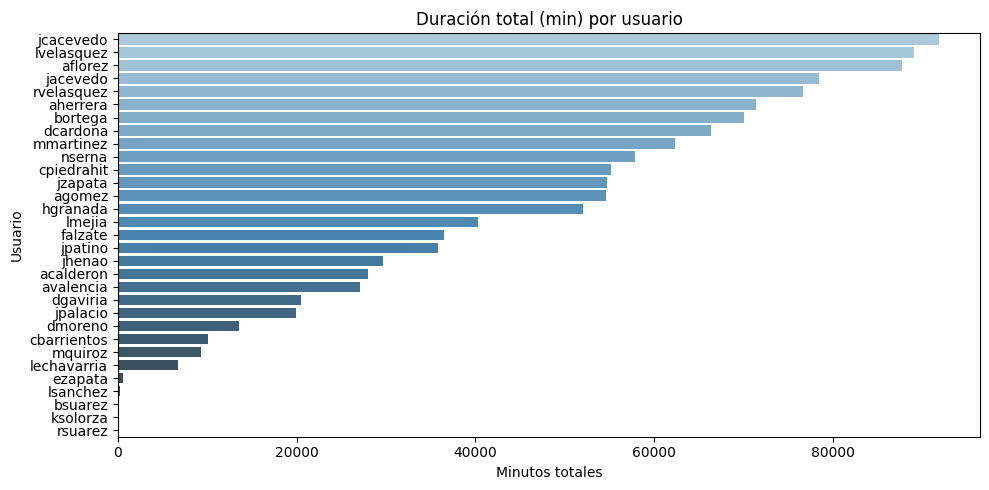

-


In [112]:
#Duracion total por usuario
# Sumar minutos por usuario
duracion_usuario = df.groupby('usuario')['duracion_min'].sum().sort_values(ascending=False)

plt.figure(figsize=(10,5))
sns.barplot(x=duracion_usuario.values, y=duracion_usuario.index, palette='Blues_d')
plt.title('Duración total (min) por usuario')
plt.xlabel('Minutos totales')
plt.ylabel('Usuario')
plt.tight_layout()
plt.show()
print("-")

C:\Users\yosse\AppData\Local\Temp\ipykernel_9368\2817067950.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=duracion_seccion.values, y=duracion_seccion.index, palette='Greens_d')


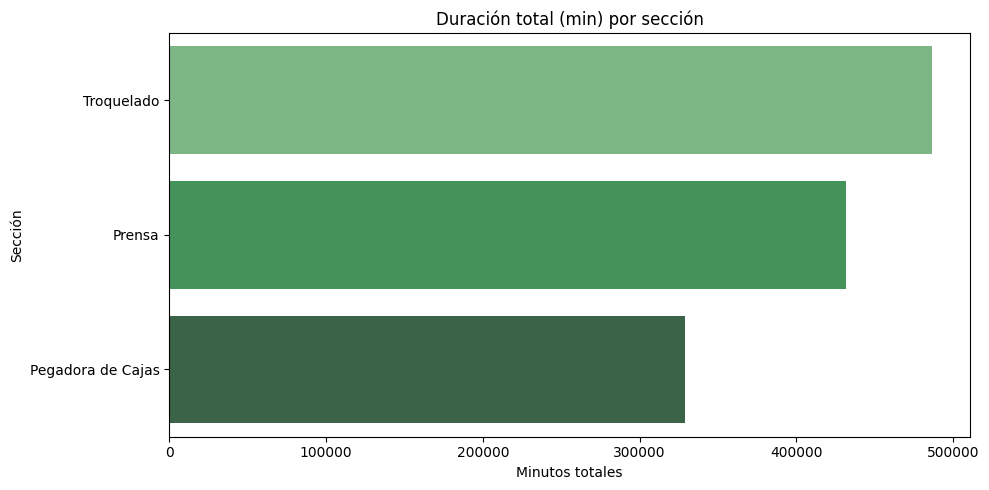

In [113]:
duracion_seccion = df.groupby('seccion')['duracion_min'].sum().sort_values(ascending=False)

plt.figure(figsize=(10,5))
sns.barplot(x=duracion_seccion.values, y=duracion_seccion.index, palette='Greens_d')
plt.title('Duración total (min) por sección')
plt.xlabel('Minutos totales')
plt.ylabel('Sección')
plt.tight_layout()
plt.show()

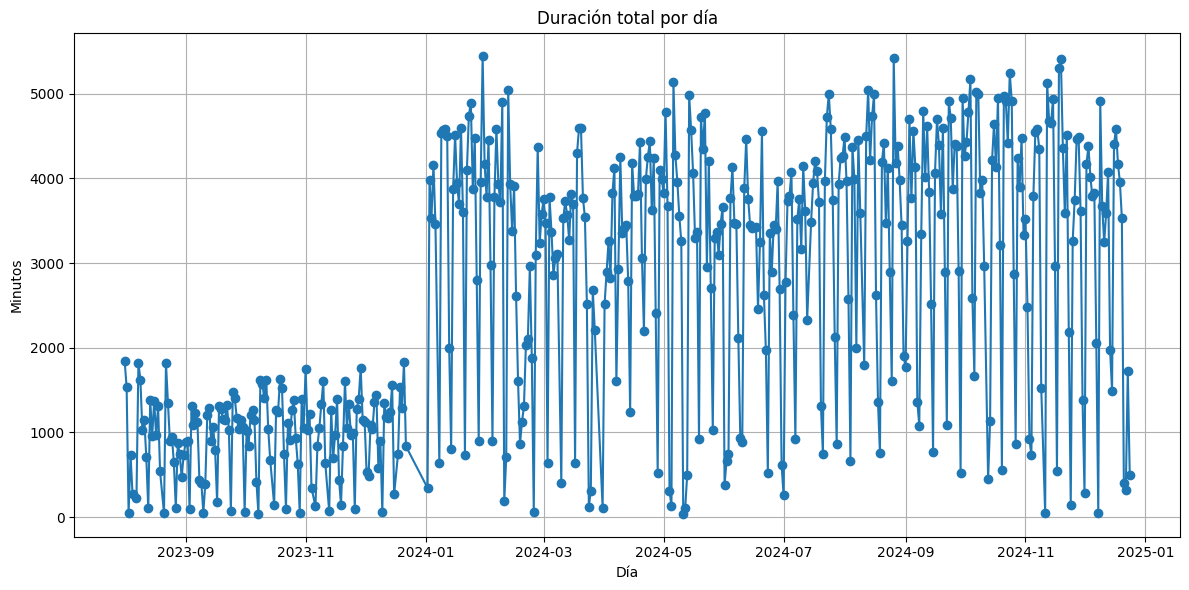

In [114]:
# Agrupado por día de inicio
uso_diario = df.groupby('dia_inicio')['duracion_min'].sum()

plt.figure(figsize=(12,6))
uso_diario.plot(marker='o')
plt.title('Duración total por día')
plt.xlabel('Día')
plt.ylabel('Minutos')
plt.grid(True)
plt.tight_layout()
plt.show()

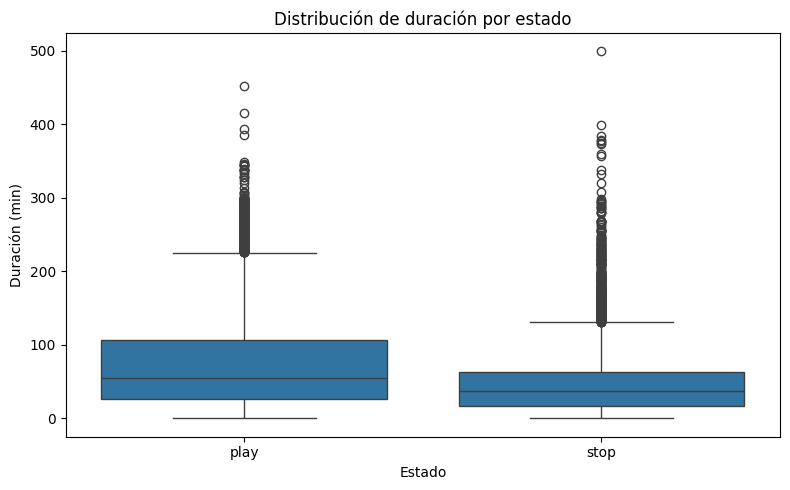

In [115]:
plt.figure(figsize=(8,5))
sns.boxplot(data=df, x='estado', y='duracion_min')
plt.title('Distribución de duración por estado')
plt.xlabel('Estado')
plt.ylabel('Duración (min)')
plt.tight_layout()
plt.show()

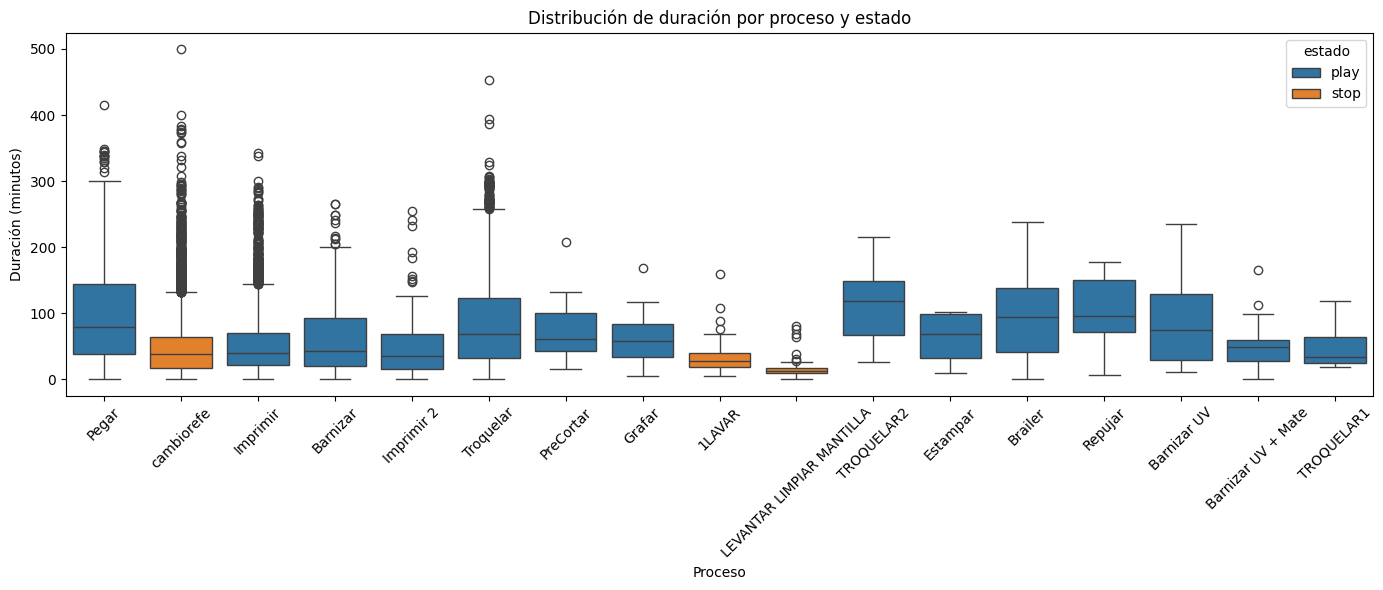

In [116]:
plt.figure(figsize=(14,6))
sns.boxplot(data=df, x='proceso', y='duracion_min', hue='estado')
plt.title('Distribución de duración por proceso y estado')
plt.xlabel('Proceso')
plt.ylabel('Duración (minutos)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


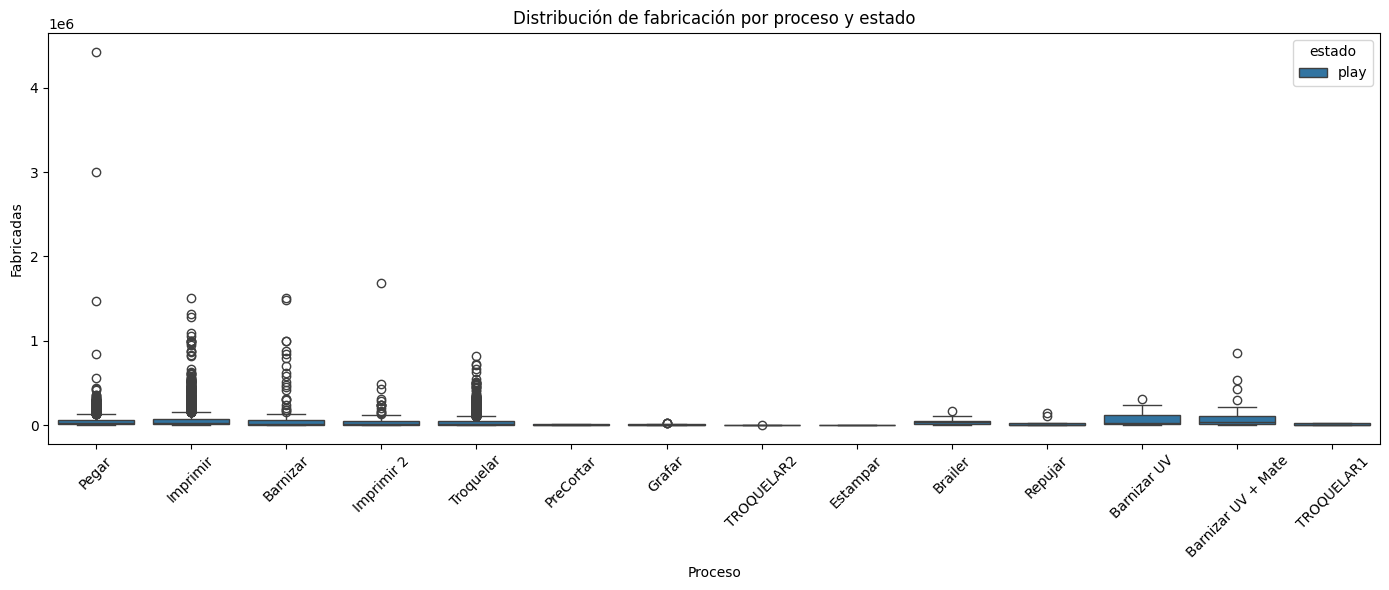

In [117]:
plt.figure(figsize=(14,6))
sns.boxplot(data=df[df['estado']=='play'], x='proceso', y='fabricadas', hue='estado')
plt.title('Distribución de fabricación por proceso y estado')
plt.xlabel('Proceso')
plt.ylabel('Fabricadas')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [118]:
#Eliminar outliers de fabricadas teniendo en cuenta el proceso
def quitar_outliers_por_proceso(grupo):
    q1 = grupo['fabricadas'].quantile(0.25)
    q3 = grupo['fabricadas'].quantile(0.75)
    iqr = q3 - q1
    li = q1 - 1.5 * iqr
    ls = q3 + 1.5 * iqr
    return grupo[(grupo['fabricadas'] >= li) & (grupo['fabricadas'] <= ls)]

# Separar datos
df_play = df[df['estado'] == 'play'].groupby('proceso', group_keys=False).apply(quitar_outliers_por_proceso)
df_rest = df[df['estado'] != 'play']

# Unirlos de nuevo
df = pd.concat([df_play, df_rest], ignore_index=True)

#Agregar un análisis para ver que usuarios cometieron más errores de digitación

C:\Users\yosse\AppData\Local\Temp\ipykernel_9368\2975634089.py:11: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df_play = df[df['estado'] == 'play'].groupby('proceso', group_keys=False).apply(quitar_outliers_por_proceso)


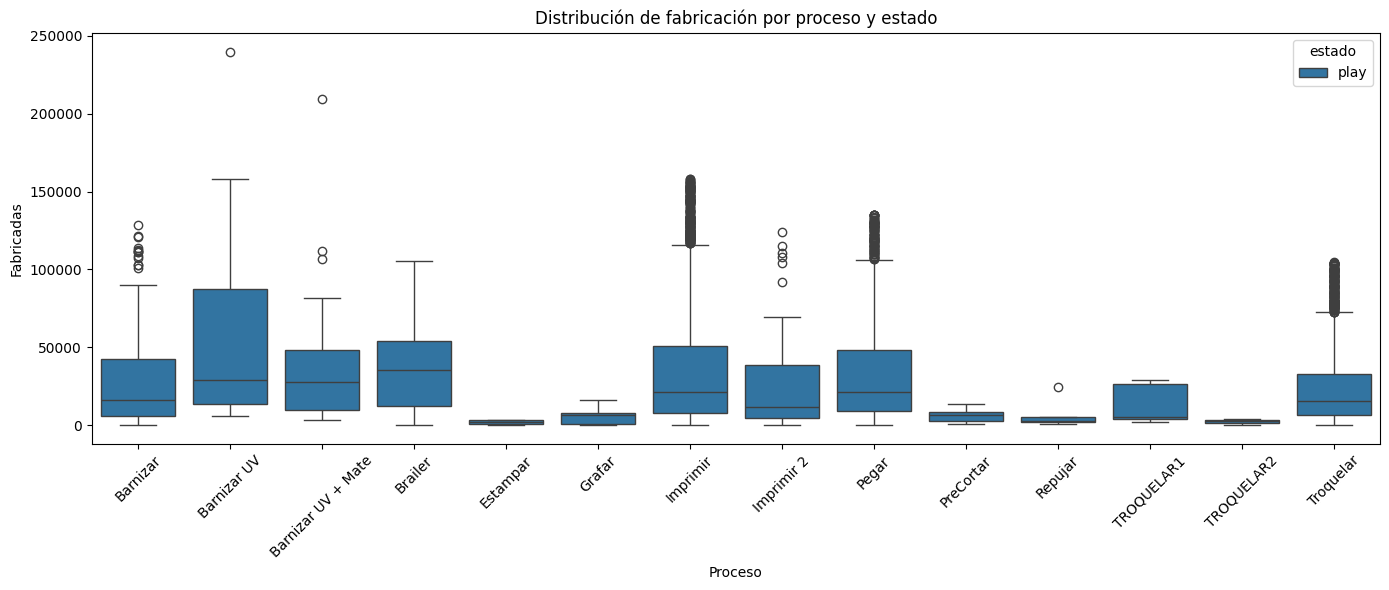

In [119]:
plt.figure(figsize=(14,6))
sns.boxplot(data=df[df['estado']=='play'], x='proceso', y='fabricadas', hue='estado')
plt.title('Distribución de fabricación por proceso y estado')
plt.xlabel('Proceso')
plt.ylabel('Fabricadas')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


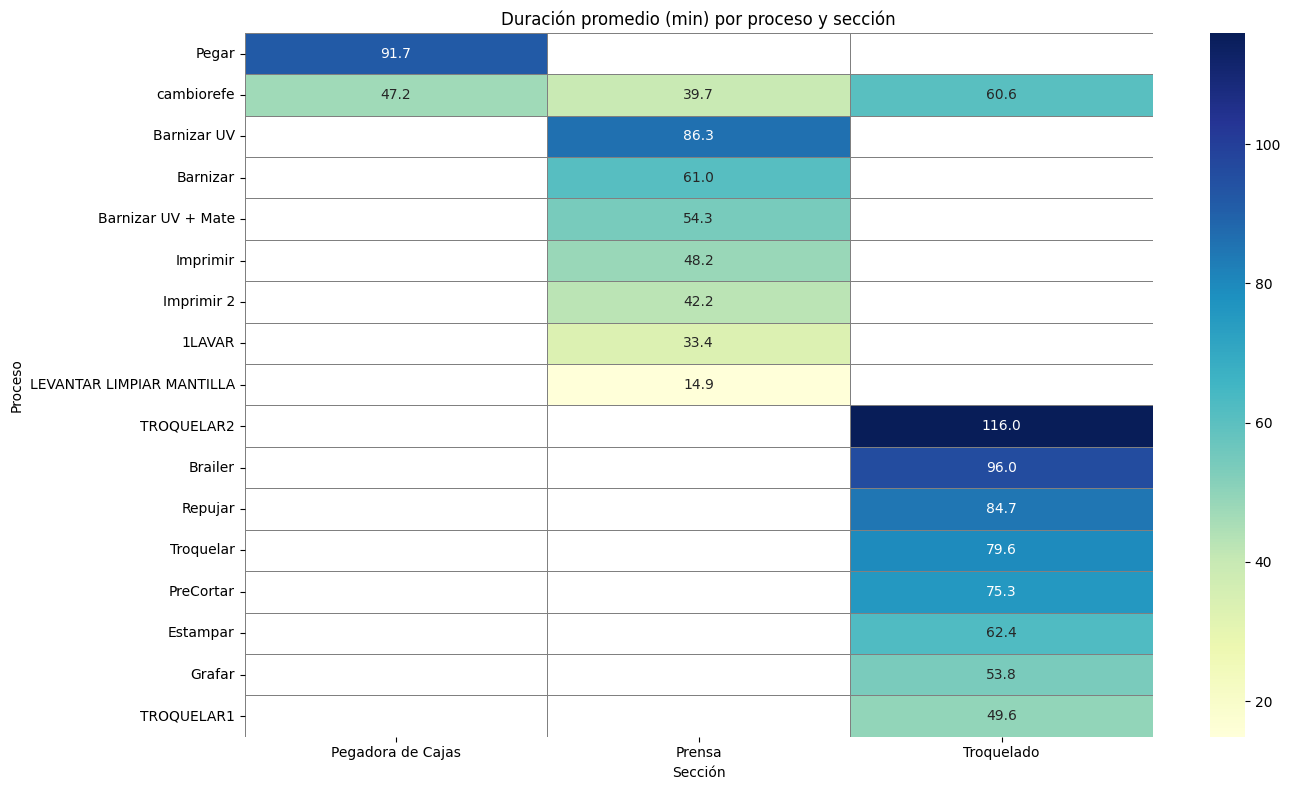

In [120]:
# Agrupar por proceso y sección
pivot = df.groupby(['proceso', 'seccion'])['duracion_min'].mean().unstack()

# Opcional: ordenar por duración total para mayor claridad
pivot = pivot.sort_values(by=pivot.columns.tolist(), ascending=False)

import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(14, 8))
sns.heatmap(pivot, annot=True, fmt=".1f", cmap='YlGnBu', linewidths=0.5, linecolor='gray')
plt.title('Duración promedio (min) por proceso y sección')
plt.xlabel('Sección')
plt.ylabel('Proceso')
plt.tight_layout()
plt.show()


In [121]:
df.head(10)

,pedido,op,referencia,maquina,seccion,proceso,usuario,estado,fabricadas,fecha_inicio,fecha_fin,duracion_sec,duracion_min,dia_inicio,hora_inicio,dia_semana_inicio,dia_fin,hora_fin,dia_semana_fin
0,27075,8235,PT-0000000388,MAQR700 - Maquina R700 6 color + barniz,Prensa,Barnizar,mmartinez,play,1.0,2023-08-01 09:39:49,2023-08-01 10:41:27,3698.0,61.63,2023-08-01,9,Tuesday,2023-08-01,10,Tuesday
1,27075,8235,PT-0000000388,MAQR700 - Maquina R700 6 color + barniz,Prensa,Barnizar,mmartinez,play,22760.0,2023-08-01 10:57:54,2023-08-01 13:32:40,9286.0,154.77,2023-08-01,10,Tuesday,2023-08-01,13,Tuesday
2,27075,8235,PT-0000000388,MAQR700 - Maquina R700 6 color + barniz,Prensa,Barnizar,mmartinez,play,7140.0,2023-08-01 15:48:37,2023-08-01 16:35:00,2783.0,46.38,2023-08-01,15,Tuesday,2023-08-01,16,Tuesday
3,27075,8235,PT-0000000388,MAQR700 - Maquina R700 6 color + barniz,Prensa,Barnizar,falzate,play,43000.0,2023-08-01 21:00:17,2023-08-02 00:20:11,11994.0,199.90,2023-08-01,21,Tuesday,2023-08-02,0,Wednesday
4,27075,8235,PT-0000000388,MAQR700 - Maquina R700 6 color + barniz,Prensa,Barnizar,falzate,play,20800.0,2023-08-02 00:00:00,2023-08-02 01:00:11,3611.0,60.18,2023-08-02,0,Wednesday,2023-08-02,1,Wednesday
5,27075,8235,PT-0000000388,MAQR700 - Maquina R700 6 color + barniz,Prensa,Barnizar,acalderon,play,7540.0,2023-08-02 01:06:32,2023-08-02 01:56:31,2999.0,49.98,2023-08-02,1,Wednesday,2023-08-02,1,Wednesday
6,27136,8311,PT-0000001497,MAQR700 - Maquina R700 6 color + barniz,Prensa,Barnizar,mmartinez,play,4580.0,2023-08-14 12:44:08,2023-08-14 13:27:34,2606.0,43.43,2023-08-14,12,Monday,2023-08-14,13,Monday
7,27136,8311,PT-0000001497,MAQR700 - Maquina R700 6 color + barniz,Prensa,Barnizar,falzate,play,45020.0,2023-08-14 19:31:49,2023-08-14 21:14:19,6150.0,102.50,2023-08-14,19,Monday,2023-08-14,21,Monday
8,27136,8311,PT-0000001497,MAQR700 - Maquina R700 6 color + barniz,Prensa,Barnizar,acalderon,play,50720.0,2023-08-15 02:04:16,2023-08-15 05:12:18,11282.0,188.03,2023-08-15,2,Tuesday,2023-08-15,5,Tuesday
9,27144,8318,PT-0000001327,MAQR700 - Maquina R700 6 color + barniz,Prensa,Barnizar,mmartinez,play,6810.0,2023-08-01 10:41:36,2023-08-01 10:42:04,28.0,0.47,2023-08-01,10,Tuesday,2023-08-01,10,Tuesday


In [122]:
print(df.columns)

Index(['pedido', 'op', 'referencia', 'maquina', 'seccion', 'proceso',
       'usuario', 'estado', 'fabricadas', 'fecha_inicio', 'fecha_fin',
       'duracion_sec', 'duracion_min', 'dia_inicio', 'hora_inicio',
       'dia_semana_inicio', 'dia_fin', 'hora_fin', 'dia_semana_fin'],
      dtype='object')


       duracion_sec  duracion_min     fabricadas
count  19212.000000  19212.000000   19212.000000
mean    3482.690870     58.044896   14983.971976
std     3208.286083     53.471381   26944.746828
min        4.000000      0.070000       0.000000
25%     1259.000000     20.980000       0.000000
50%     2542.500000     42.375000       0.000000
75%     4663.500000     77.727500   18752.500000
max    29969.000000    499.480000  240000.000000


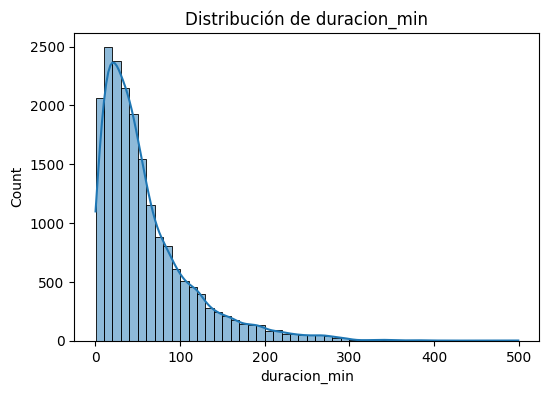

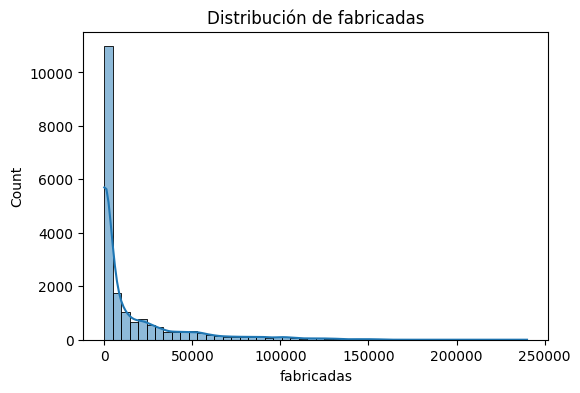

In [123]:
# Estadísticas básicas
print(df[['duracion_sec', 'duracion_min', 'fabricadas']].describe())

# Distribuciones
import seaborn as sns
import matplotlib.pyplot as plt

for col in ['duracion_min', 'fabricadas']:
    plt.figure(figsize=(6,4))
    sns.histplot(df[col], bins=50, kde=True)
    plt.title(f'Distribución de {col}')
    plt.show()

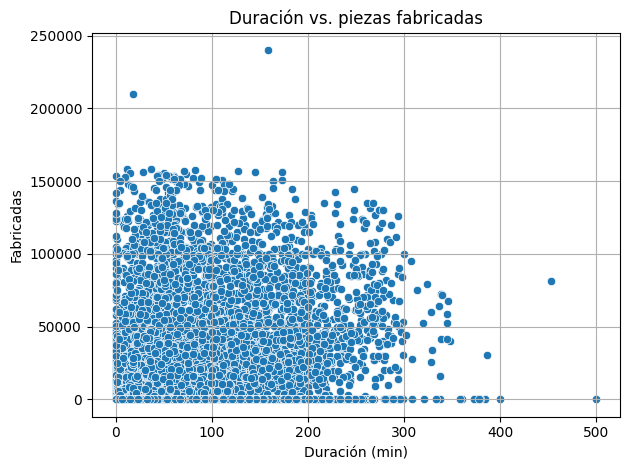

              duracion_min  duracion_sec  fabricadas
duracion_min      1.000000      1.000000    0.332695
duracion_sec      1.000000      1.000000    0.332695
fabricadas        0.332695      0.332695    1.000000


In [124]:
sns.scatterplot(data=df, x='duracion_min', y='fabricadas')
plt.title('Duración vs. piezas fabricadas')
plt.xlabel('Duración (min)')
plt.ylabel('Fabricadas')
plt.grid(True)
plt.tight_layout()
plt.show()

# Correlación numérica
print(df[['duracion_min', 'duracion_sec', 'fabricadas']].corr())

In [125]:
df.head(10)

,pedido,op,referencia,maquina,seccion,proceso,usuario,estado,fabricadas,fecha_inicio,fecha_fin,duracion_sec,duracion_min,dia_inicio,hora_inicio,dia_semana_inicio,dia_fin,hora_fin,dia_semana_fin
0,27075,8235,PT-0000000388,MAQR700 - Maquina R700 6 color + barniz,Prensa,Barnizar,mmartinez,play,1.0,2023-08-01 09:39:49,2023-08-01 10:41:27,3698.0,61.63,2023-08-01,9,Tuesday,2023-08-01,10,Tuesday
1,27075,8235,PT-0000000388,MAQR700 - Maquina R700 6 color + barniz,Prensa,Barnizar,mmartinez,play,22760.0,2023-08-01 10:57:54,2023-08-01 13:32:40,9286.0,154.77,2023-08-01,10,Tuesday,2023-08-01,13,Tuesday
2,27075,8235,PT-0000000388,MAQR700 - Maquina R700 6 color + barniz,Prensa,Barnizar,mmartinez,play,7140.0,2023-08-01 15:48:37,2023-08-01 16:35:00,2783.0,46.38,2023-08-01,15,Tuesday,2023-08-01,16,Tuesday
3,27075,8235,PT-0000000388,MAQR700 - Maquina R700 6 color + barniz,Prensa,Barnizar,falzate,play,43000.0,2023-08-01 21:00:17,2023-08-02 00:20:11,11994.0,199.90,2023-08-01,21,Tuesday,2023-08-02,0,Wednesday
4,27075,8235,PT-0000000388,MAQR700 - Maquina R700 6 color + barniz,Prensa,Barnizar,falzate,play,20800.0,2023-08-02 00:00:00,2023-08-02 01:00:11,3611.0,60.18,2023-08-02,0,Wednesday,2023-08-02,1,Wednesday
5,27075,8235,PT-0000000388,MAQR700 - Maquina R700 6 color + barniz,Prensa,Barnizar,acalderon,play,7540.0,2023-08-02 01:06:32,2023-08-02 01:56:31,2999.0,49.98,2023-08-02,1,Wednesday,2023-08-02,1,Wednesday
6,27136,8311,PT-0000001497,MAQR700 - Maquina R700 6 color + barniz,Prensa,Barnizar,mmartinez,play,4580.0,2023-08-14 12:44:08,2023-08-14 13:27:34,2606.0,43.43,2023-08-14,12,Monday,2023-08-14,13,Monday
7,27136,8311,PT-0000001497,MAQR700 - Maquina R700 6 color + barniz,Prensa,Barnizar,falzate,play,45020.0,2023-08-14 19:31:49,2023-08-14 21:14:19,6150.0,102.50,2023-08-14,19,Monday,2023-08-14,21,Monday
8,27136,8311,PT-0000001497,MAQR700 - Maquina R700 6 color + barniz,Prensa,Barnizar,acalderon,play,50720.0,2023-08-15 02:04:16,2023-08-15 05:12:18,11282.0,188.03,2023-08-15,2,Tuesday,2023-08-15,5,Tuesday
9,27144,8318,PT-0000001327,MAQR700 - Maquina R700 6 color + barniz,Prensa,Barnizar,mmartinez,play,6810.0,2023-08-01 10:41:36,2023-08-01 10:42:04,28.0,0.47,2023-08-01,10,Tuesday,2023-08-01,10,Tuesday


*Ingeniería de variables*

In [126]:
df_char = df.copy()

#Eficiencia por minuto
df_char['eficiencia_piezas_por_min'] = df_char.apply(
    lambda row: row['fabricadas'] / row['duracion_min']
    if row['estado'] == 'play' and row['duracion_min'] > 0 else np.nan, axis=1
)

In [127]:
#Pueden existir valores de eficiencia por fuera de los rangos, por lo que se eliminan
def filtrar_outliers_por_proceso(grupo):
    q1 = grupo['eficiencia_piezas_por_min'].quantile(0.25)
    q3 = grupo['eficiencia_piezas_por_min'].quantile(0.75)
    iqr = q3 - q1
    lim_sup = q3 + 1.5 * iqr
    return grupo[(grupo['eficiencia_piezas_por_min'] <= lim_sup) | grupo['eficiencia_piezas_por_min'].isna()]

# Aplicar solo sobre registros 'play'
df_filtrados = df_char[df_char['estado'] == 'play'].groupby('proceso', group_keys=False).apply(filtrar_outliers_por_proceso)
# Unir con los otros
df_char = pd.concat([df_filtrados, df_char[df_char['estado'] != 'play']], ignore_index=True)

C:\Users\yosse\AppData\Local\Temp\ipykernel_9368\565925035.py:10: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df_filtrados = df_char[df_char['estado'] == 'play'].groupby('proceso', group_keys=False).apply(filtrar_outliers_por_proceso)


In [128]:
# Clasificar el turno a partir de la hora
def clasificar_turno(hora):
    if 6 <= hora < 12:
        return 'Mañana'
    elif 12 <= hora < 21:   
        return 'Tarde'
    else:
        return 'Noche'

df_char['turno'] = df_char['hora_inicio'].apply(clasificar_turno)
orden_turnos = ['Mañana', 'Tarde', 'Noche']
df_char['turno'] = pd.Categorical(df_char['turno'], categories=orden_turnos, ordered=True)

In [129]:
# Calcular promedio de duración por proceso, solo para estado 'play'
promedios_por_proceso_play = df_char[df_char['estado'] == 'play'].groupby('proceso')['duracion_min'].mean()

In [130]:
# Mapear al dataframe completo (esto permite que cada fila tenga el promedio de su proceso)
df_char['promedio_duracion_proceso_play'] = df_char['proceso'].map(promedios_por_proceso_play)

In [131]:
# Calcular la relación entre duración individual y el promedio del proceso (solo útil si ese promedio existe)
df_char['duracion_vs_proceso'] = df_char['duracion_min'] / df_char['promedio_duracion_proceso_play']


In [132]:
df_play = df_char[df_char['estado'] == 'play']
df_play.head(10)

,pedido,op,referencia,maquina,seccion,proceso,usuario,estado,fabricadas,fecha_inicio,...,dia_inicio,hora_inicio,dia_semana_inicio,dia_fin,hora_fin,dia_semana_fin,eficiencia_piezas_por_min,turno,promedio_duracion_proceso_play,duracion_vs_proceso
0,27075,8235,PT-0000000388,MAQR700 - Maquina R700 6 color + barniz,Prensa,Barnizar,mmartinez,play,1.0,2023-08-01 09:39:49,...,2023-08-01,9,Tuesday,2023-08-01,10,Tuesday,0.016226,Mañana,67.645028,0.911080
1,27075,8235,PT-0000000388,MAQR700 - Maquina R700 6 color + barniz,Prensa,Barnizar,mmartinez,play,22760.0,2023-08-01 10:57:54,...,2023-08-01,10,Tuesday,2023-08-01,13,Tuesday,147.056923,Mañana,67.645028,2.287973
2,27075,8235,PT-0000000388,MAQR700 - Maquina R700 6 color + barniz,Prensa,Barnizar,mmartinez,play,7140.0,2023-08-01 15:48:37,...,2023-08-01,15,Tuesday,2023-08-01,16,Tuesday,153.945666,Tarde,67.645028,0.685638
3,27075,8235,PT-0000000388,MAQR700 - Maquina R700 6 color + barniz,Prensa,Barnizar,falzate,play,43000.0,2023-08-01 21:00:17,...,2023-08-01,21,Tuesday,2023-08-02,0,Wednesday,215.107554,Noche,67.645028,2.955132
4,27075,8235,PT-0000000388,MAQR700 - Maquina R700 6 color + barniz,Prensa,Barnizar,falzate,play,20800.0,2023-08-02 00:00:00,...,2023-08-02,0,Wednesday,2023-08-02,1,Wednesday,345.629777,Noche,67.645028,0.889644
5,27075,8235,PT-0000000388,MAQR700 - Maquina R700 6 color + barniz,Prensa,Barnizar,acalderon,play,7540.0,2023-08-02 01:06:32,...,2023-08-02,1,Wednesday,2023-08-02,1,Wednesday,150.860344,Noche,67.645028,0.738857
6,27136,8311,PT-0000001497,MAQR700 - Maquina R700 6 color + barniz,Prensa,Barnizar,mmartinez,play,4580.0,2023-08-14 12:44:08,...,2023-08-14,12,Monday,2023-08-14,13,Monday,105.457057,Tarde,67.645028,0.642028
7,27136,8311,PT-0000001497,MAQR700 - Maquina R700 6 color + barniz,Prensa,Barnizar,falzate,play,45020.0,2023-08-14 19:31:49,...,2023-08-14,19,Monday,2023-08-14,21,Monday,439.219512,Tarde,67.645028,1.515263
8,27136,8311,PT-0000001497,MAQR700 - Maquina R700 6 color + barniz,Prensa,Barnizar,acalderon,play,50720.0,2023-08-15 02:04:16,...,2023-08-15,2,Tuesday,2023-08-15,5,Tuesday,269.744190,Noche,67.645028,2.779657
9,27144,8318,PT-0000001327,MAQR700 - Maquina R700 6 color + barniz,Prensa,Barnizar,acalderon,play,6750.0,2023-08-02 04:37:46,...,2023-08-02,4,Wednesday,2023-08-02,4,Wednesday,398.700532,Noche,67.645028,0.250277


C:\Users\yosse\AppData\Local\Temp\ipykernel_9368\2160758589.py:1: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  heatmap_sec_turno = df_char.pivot_table(


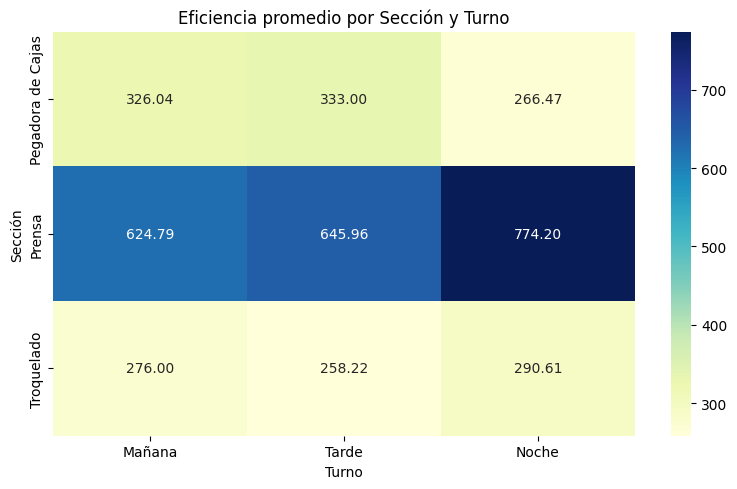

In [133]:
heatmap_sec_turno = df_char.pivot_table(
    index='seccion', columns='turno', values='eficiencia_piezas_por_min', aggfunc='mean')

plt.figure(figsize=(8, 5))
sns.heatmap(heatmap_sec_turno, annot=True, fmt=".2f", cmap='YlGnBu')
plt.title('Eficiencia promedio por Sección y Turno')
plt.xlabel('Turno')
plt.ylabel('Sección')
plt.tight_layout()
plt.show()

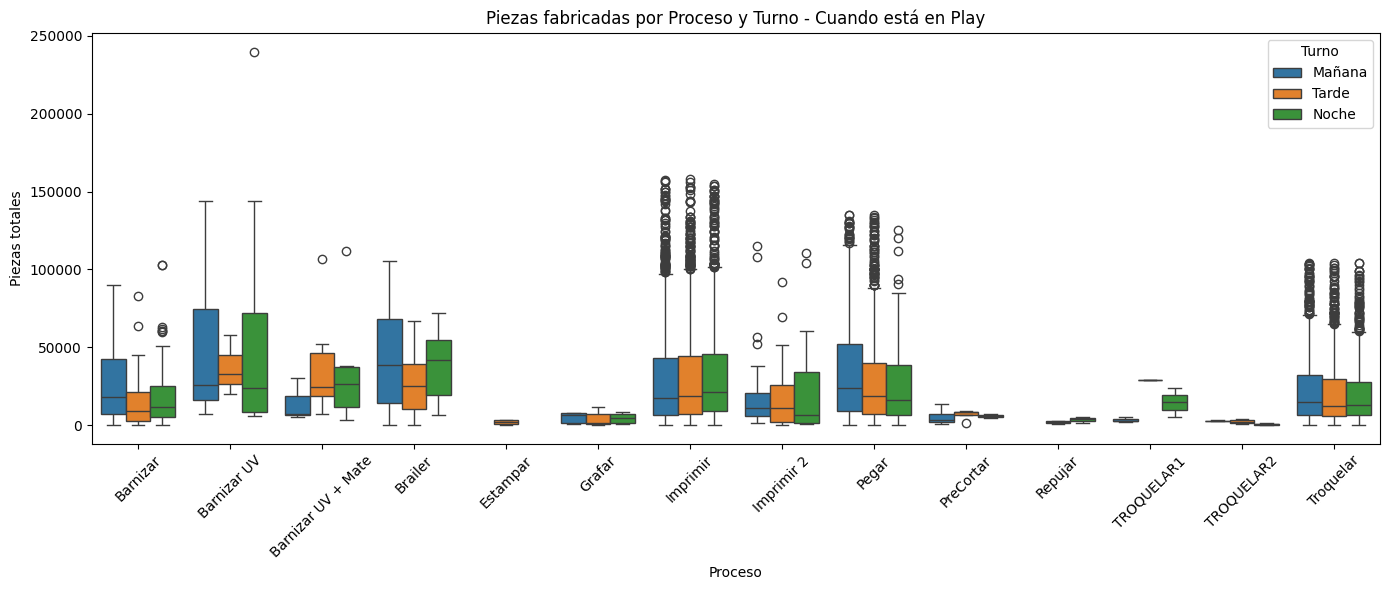

In [134]:
plt.figure(figsize=(14, 6))
sns.boxplot(
    data=df_play,
    x='proceso',
    y='fabricadas',
    hue='turno'
)
plt.title('Piezas fabricadas por Proceso y Turno - Cuando está en Play')
plt.xlabel('Proceso')
plt.ylabel('Piezas totales')
plt.xticks(rotation=45)
plt.legend(title='Turno')
plt.tight_layout()
plt.show()

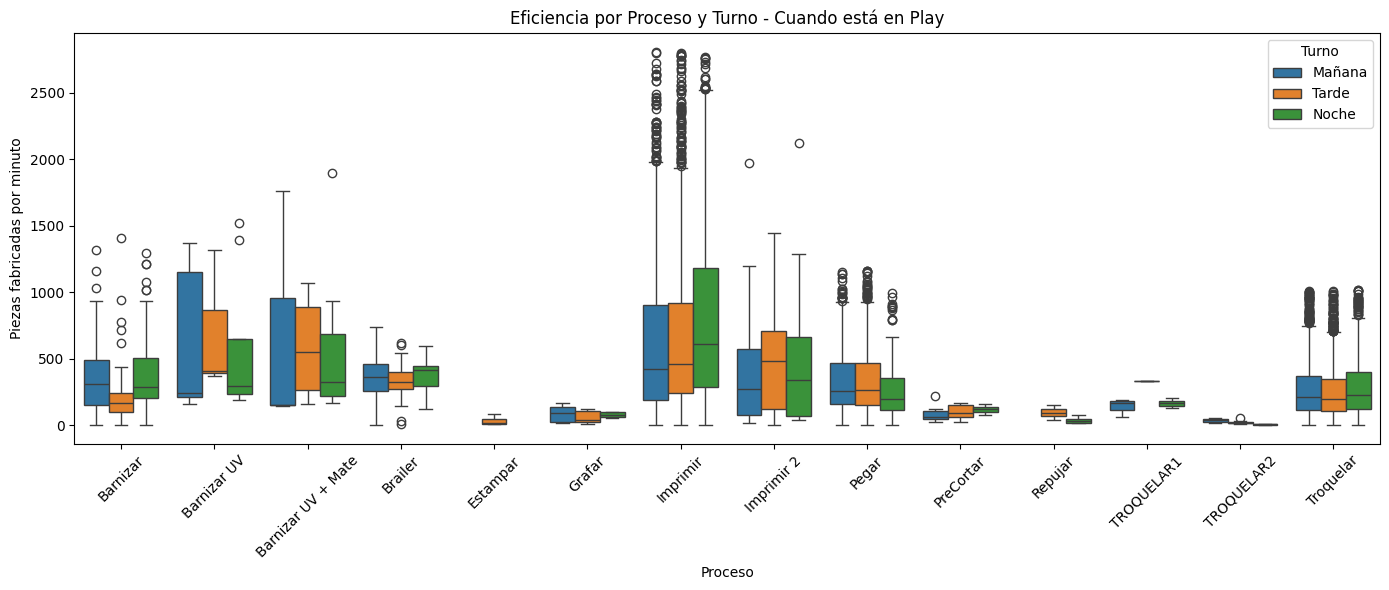

In [135]:
plt.figure(figsize=(14, 6))
sns.boxplot(
    data=df_play,
    x='proceso',
    y='eficiencia_piezas_por_min',
    hue='turno'
)
plt.title('Eficiencia por Proceso y Turno - Cuando está en Play')
plt.xlabel('Proceso')
plt.ylabel('Piezas fabricadas por minuto')
plt.xticks(rotation=45)
plt.legend(title='Turno')
plt.tight_layout()
plt.show()

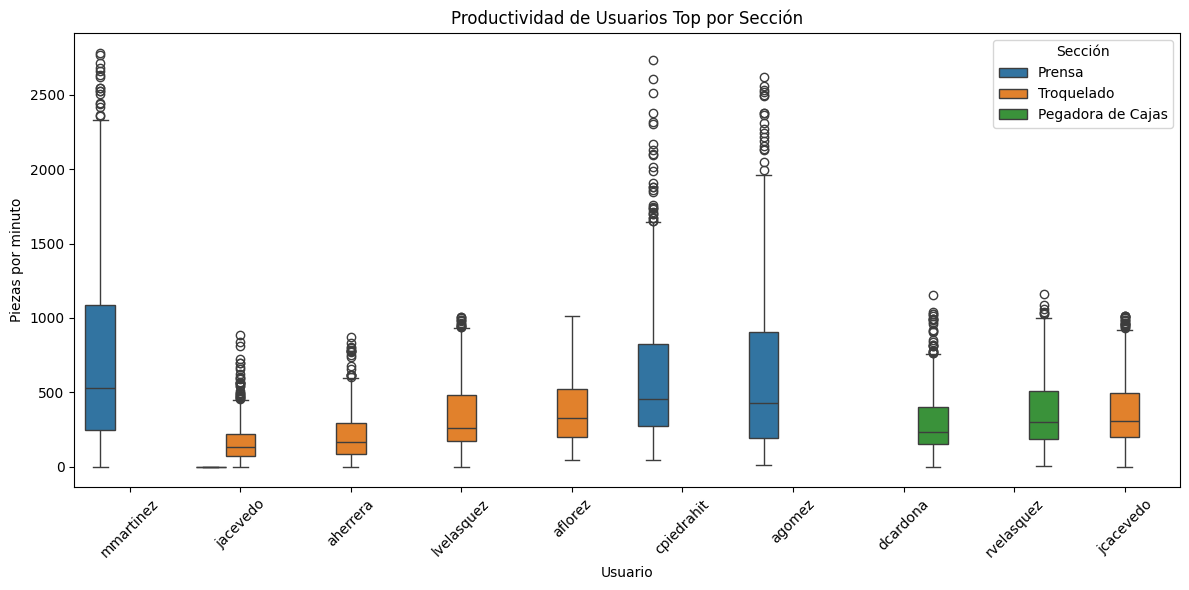

In [136]:
usuarios_top = df_char[df_char['estado'] == 'play']['usuario'].value_counts().head(10).index

plt.figure(figsize=(12, 6))
sns.boxplot(
    data=df_char[(df_char['estado'] == 'play') & (df_char['usuario'].isin(usuarios_top))],
    x='usuario',
    y='eficiencia_piezas_por_min',
    hue='seccion'
)
plt.title('Productividad de Usuarios Top por Sección')
plt.xlabel('Usuario')
plt.ylabel('Piezas por minuto')
plt.xticks(rotation=45)
plt.legend(title='Sección')
plt.tight_layout()
plt.show()

C:\Users\yosse\AppData\Local\Temp\ipykernel_9368\418316137.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  .groupby(['dia_inicio', 'turno'])['eficiencia_piezas_por_min']


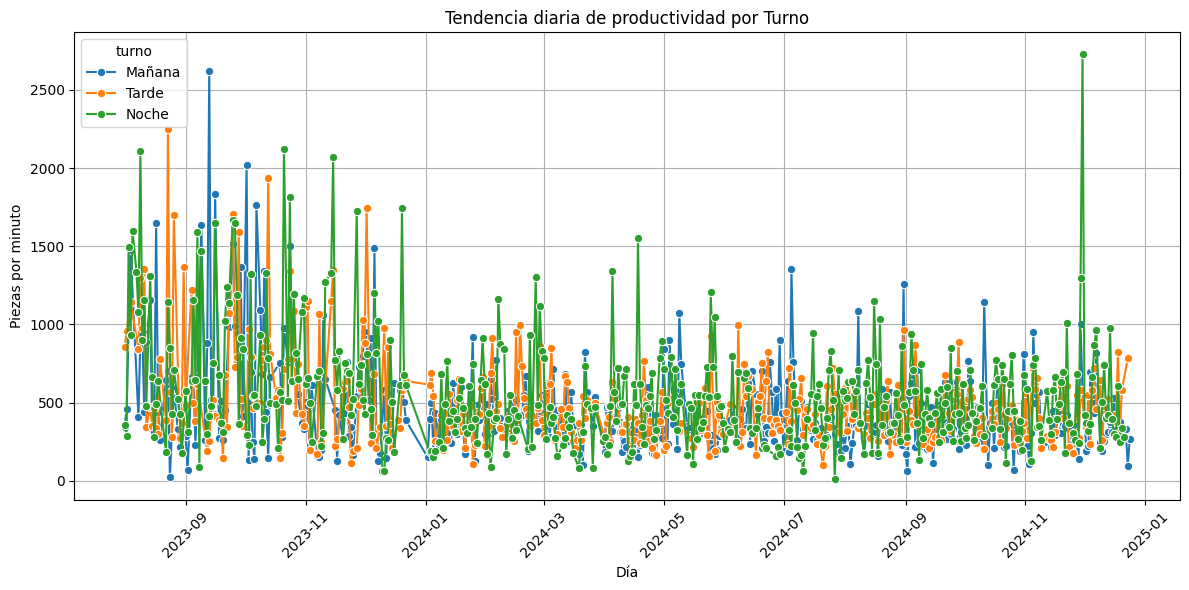

In [137]:
df_diaria_turno = (
    df_char[df_char['estado'] == 'play']
    .groupby(['dia_inicio', 'turno'])['eficiencia_piezas_por_min']
    .mean()
    .reset_index()
)

plt.figure(figsize=(12, 6))
sns.lineplot(
    data=df_diaria_turno,
    x='dia_inicio',
    y='eficiencia_piezas_por_min',
    hue='turno',
    marker='o'
)
plt.title('Tendencia diaria de productividad por Turno')
plt.xlabel('Día')
plt.ylabel('Piezas por minuto')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

In [138]:
df_char.head(10)

,pedido,op,referencia,maquina,seccion,proceso,usuario,estado,fabricadas,fecha_inicio,...,dia_inicio,hora_inicio,dia_semana_inicio,dia_fin,hora_fin,dia_semana_fin,eficiencia_piezas_por_min,turno,promedio_duracion_proceso_play,duracion_vs_proceso
0,27075,8235,PT-0000000388,MAQR700 - Maquina R700 6 color + barniz,Prensa,Barnizar,mmartinez,play,1.0,2023-08-01 09:39:49,...,2023-08-01,9,Tuesday,2023-08-01,10,Tuesday,0.016226,Mañana,67.645028,0.911080
1,27075,8235,PT-0000000388,MAQR700 - Maquina R700 6 color + barniz,Prensa,Barnizar,mmartinez,play,22760.0,2023-08-01 10:57:54,...,2023-08-01,10,Tuesday,2023-08-01,13,Tuesday,147.056923,Mañana,67.645028,2.287973
2,27075,8235,PT-0000000388,MAQR700 - Maquina R700 6 color + barniz,Prensa,Barnizar,mmartinez,play,7140.0,2023-08-01 15:48:37,...,2023-08-01,15,Tuesday,2023-08-01,16,Tuesday,153.945666,Tarde,67.645028,0.685638
3,27075,8235,PT-0000000388,MAQR700 - Maquina R700 6 color + barniz,Prensa,Barnizar,falzate,play,43000.0,2023-08-01 21:00:17,...,2023-08-01,21,Tuesday,2023-08-02,0,Wednesday,215.107554,Noche,67.645028,2.955132
4,27075,8235,PT-0000000388,MAQR700 - Maquina R700 6 color + barniz,Prensa,Barnizar,falzate,play,20800.0,2023-08-02 00:00:00,...,2023-08-02,0,Wednesday,2023-08-02,1,Wednesday,345.629777,Noche,67.645028,0.889644
5,27075,8235,PT-0000000388,MAQR700 - Maquina R700 6 color + barniz,Prensa,Barnizar,acalderon,play,7540.0,2023-08-02 01:06:32,...,2023-08-02,1,Wednesday,2023-08-02,1,Wednesday,150.860344,Noche,67.645028,0.738857
6,27136,8311,PT-0000001497,MAQR700 - Maquina R700 6 color + barniz,Prensa,Barnizar,mmartinez,play,4580.0,2023-08-14 12:44:08,...,2023-08-14,12,Monday,2023-08-14,13,Monday,105.457057,Tarde,67.645028,0.642028
7,27136,8311,PT-0000001497,MAQR700 - Maquina R700 6 color + barniz,Prensa,Barnizar,falzate,play,45020.0,2023-08-14 19:31:49,...,2023-08-14,19,Monday,2023-08-14,21,Monday,439.219512,Tarde,67.645028,1.515263
8,27136,8311,PT-0000001497,MAQR700 - Maquina R700 6 color + barniz,Prensa,Barnizar,acalderon,play,50720.0,2023-08-15 02:04:16,...,2023-08-15,2,Tuesday,2023-08-15,5,Tuesday,269.744190,Noche,67.645028,2.779657
9,27144,8318,PT-0000001327,MAQR700 - Maquina R700 6 color + barniz,Prensa,Barnizar,acalderon,play,6750.0,2023-08-02 04:37:46,...,2023-08-02,4,Wednesday,2023-08-02,4,Wednesday,398.700532,Noche,67.645028,0.250277


In [139]:
#df_char.to_excel("data/BASE DE DATOS PCC_cleaned.xlsx", index=False)
print(df_char.columns)

Index(['pedido', 'op', 'referencia', 'maquina', 'seccion', 'proceso',
       'usuario', 'estado', 'fabricadas', 'fecha_inicio', 'fecha_fin',
       'duracion_sec', 'duracion_min', 'dia_inicio', 'hora_inicio',
       'dia_semana_inicio', 'dia_fin', 'hora_fin', 'dia_semana_fin',
       'eficiencia_piezas_por_min', 'turno', 'promedio_duracion_proceso_play',
       'duracion_vs_proceso'],
      dtype='object')


# *Modelos*

1. Eficiencia de piezas por minuto o fabricadas totales dadas (solo se considerarán los datos que se tienen cuando la máquina está en play):
    - Tipo de proceso.
    - Sección
    - Turno
    - Maquina
    - Usuario

In [140]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LassoCV
from sklearn.preprocessing import StandardScaler, OrdinalEncoder
from sklearn.model_selection import train_test_split

# 1. Filtramos los datos
df_modelo = df_char[(df_char['estado'] == 'play') & (df_char['eficiencia_piezas_por_min'].notna())].copy()

# 2. Variables
features = ['referencia', 'maquina', 'seccion', 'proceso',
       'usuario',
       'duracion_min', 'hora_inicio',
       'dia_semana_inicio','turno']
X = df_modelo[features].copy()
y = df_modelo['fabricadas']

# 3. Codificación ordinal de variables categóricas
cat_features = ['turno', 'seccion', 'proceso','maquina','referencia','usuario','dia_semana_inicio']
encoder = OrdinalEncoder()
X[cat_features] = encoder.fit_transform(X[cat_features])

# 4. Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
# 5. Escalado
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 6. Modelo Lasso
lasso = LassoCV(cv=5, random_state=0)
lasso.fit(X_train_scaled, y_train)

# 7. Coeficientes
coef_df = pd.Series(lasso.coef_, index=features)
print("Coeficientes Lasso:")
print(coef_df)

# 8. Variables seleccionadas
selected_features = coef_df[coef_df != 0].index.tolist()
print("\nVariables seleccionadas por Lasso:")
print(selected_features)

# 9. Desempeño
print("\nR² en test:", lasso.score(X_test_scaled, y_test))


Coeficientes Lasso:
referencia            2362.657031
maquina               3915.661871
seccion              -1490.680325
proceso              -4406.901672
usuario                686.646687
duracion_min         14561.706143
hora_inicio           -391.053359
dia_semana_inicio      599.896162
turno                   -0.000000
dtype: float64

Variables seleccionadas por Lasso:
['referencia', 'maquina', 'seccion', 'proceso', 'usuario', 'duracion_min', 'hora_inicio', 'dia_semana_inicio']

R² en test: 0.28793946585092667


In [141]:
X_train_scaled

array([[-1.42936154,  0.7422641 , -0.14624405, ...,  1.00434205,
         1.27900733,  1.07470195],
       [-1.31926445,  1.10756685, -0.14624405, ..., -0.44709174,
         0.82565436, -1.2603166 ],
       [ 1.36893936, -0.7189469 ,  1.19129616, ...,  1.81069416,
        -1.44111049, -0.09280733],
       ...,
       [-1.40642465, -1.08424965, -1.48378427, ...,  0.52053079,
        -0.53440455,  1.07470195],
       [ 1.45609956,  0.7422641 , -0.14624405, ...,  0.84307163,
        -1.44111049,  1.07470195],
       [-1.47523532,  1.10756685, -0.14624405, ...,  1.97196459,
         0.37230139, -0.09280733]])

In [142]:
#Seleccion de variables por significancia estadística

import statsmodels.api as sm
# Agregar constante para el modelo OLS
X_train_ols = sm.add_constant(X_train_scaled)
#Add headers to the DataFrame
X_train_ols = pd.DataFrame(X_train_ols, columns=['const'] + features)

# Ajustar el modelo OLS asegurando que los índices estén alineados
model = sm.OLS(y_train.reset_index(drop=True), X_train_ols)

result = model.fit()

# Resumen del modelo
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             fabricadas   R-squared:                       0.266
Model:                            OLS   Adj. R-squared:                  0.265
Method:                 Least Squares   F-statistic:                     272.7
Date:               vie, 30 may. 2025   Prob (F-statistic):               0.00
Time:                        20:26:36   Log-Likelihood:                -78146.
No. Observations:                6768   AIC:                         1.563e+05
Df Residuals:                    6758   BIC:                         1.564e+05
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const              2.748e+04    304.365     90.302      0.000    2.69e+04    2.81e+04
referencia         2425.0964    309.640      7.832      0.000    1818.104    3032.088
maquina            4063.8519    456.731      8.898      0.000    3168.515    4959.189
seccion           -1621.8513    536.973     -3.020      0.003   -2674.488    -569.215
proceso           -4360.6872    547.476     -7.965      0.000   -5433.914   -3287.461
usuario             753.1310    307.044      2.453      0.014     151.229    1355.033
duracion_min       1.464e+04    321.952     45.464      0.000     1.4e+04    1.53e+04
hora_inicio        -439.7984    360.837     -1.219      0.223   -1147.153     267.556
dia_semana_inicio   662.4428    304.580      2.175      0.030      65.370    1259.516
turno               -29.2347    358.671     -0.082      0.935    -732.343     673.873
==============================================================================
Omnibus:                     2071.821   Durbin-Watson:                   1.952
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             6537.720
Skew:                           1.568   Prob(JB):                         0.00
Kurtosis:                       6.654   Cond. No.                         3.53
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [143]:
# 2. Variables sin turno
features = ['referencia', 'maquina', 'seccion', 'proceso',
       'usuario','duracion_min', 'hora_inicio','dia_semana_inicio']
X = df_modelo[features].copy()
y = df_modelo['fabricadas']

# 3. Codificación ordinal de variables categóricas sin turno
cat_features = ['seccion', 'proceso','maquina','referencia','usuario','dia_semana_inicio']
encoder = OrdinalEncoder()
X[cat_features] = encoder.fit_transform(X[cat_features])

# 4. Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
# 5. Escalado
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [144]:
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor
from sklearn.linear_model import Lasso, LinearRegression, Ridge
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neural_network import MLPRegressor

models = {
    'LinearRegression': {
        'model': LinearRegression(),
        'params': {}
    },
    'Lasso': {
        'model': Lasso(),
        'params': {
            'alpha': [0.001, 0.01, 0.1, 1.0, 10.0]
        }
    },
    'Ridge': {
        'model': Ridge(),
        'params': {
            'alpha': [0.01, 0.1, 1.0, 10.0, 100.0]
        }
    },
    'RandomForest': {
        'model': RandomForestRegressor(random_state=42),
        'params': {
            'n_estimators': [50, 100],
            'max_depth': [None, 10, 20],
            'min_samples_split': [2, 5]
        }
    },
    'GradientBoosting': {
        'model': GradientBoostingRegressor(random_state=42),
        'params': {
            'n_estimators': [50, 100],
            'learning_rate': [0.05, 0.1],
            'max_depth': [3, 5]
        }
    },
    'KNN': {
        'model': KNeighborsRegressor(),
        'params': {
            'n_neighbors': [1,3, 5, 7, 9, 11,15,20,25,30,35,40],
            'weights': ['uniform', 'distance'],
            'p': [1, 2]  # 1 = Manhattan, 2 = Euclidean
        }
    },
    # "MLPRegressor": {
    #     "model": MLPRegressor(max_iter=1000, random_state=42),
    #     "params": {
    #         "hidden_layer_sizes": [(50,), (100,), (100, 50)],
    #         "activation": ["relu", "tanh"],
    #         "solver": ["adam"],
    #         "alpha": [0.0001, 0.001],
    #         "learning_rate": ["constant", "adaptive"]
    #     }
    # }
}


In [145]:
from sklearn.model_selection import GridSearchCV, cross_val_predict
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, root_mean_squared_error
import time
import pandas as pd

tuned_results = {}
all_grid_results = []

for name, config in models.items():
    print(f"Evaluando: {name}")
    start_time = time.time()

    # Entrenamiento con GridSearchCV
    grid = GridSearchCV(
        estimator=config["model"],
        param_grid=config["params"],
        cv=5,
        scoring="neg_root_mean_squared_error",
        n_jobs=-1
    )

    grid.fit(X_train_scaled, y_train)
    best_model = grid.best_estimator_
    end_time = time.time()
    training_time = end_time - start_time

    # Predicciones con validación cruzada
    y_pred = cross_val_predict(best_model, X_train_scaled, y_train, cv=5)

    tuned_results[name] = {
        "Model": best_model,
        "Best Params": grid.best_params_,
        "RMSE": root_mean_squared_error(y_train, y_pred),
        "MAE": mean_absolute_error(y_train, y_pred),
        "R2 Score": r2_score(y_train, y_pred),
        "Training Time (s)": training_time
    }

    print(tuned_results[name])
    print("\n" + "="*50 + "\n")

    # Guardamos todos los resultados del grid
    grid_df = pd.DataFrame(grid.cv_results_)
    grid_df["Model"] = name
    all_grid_results.append(grid_df)

# Tabla con métricas de resumen (sin perder los modelos)
tuned_metrics = pd.DataFrame({
    model_name: {k: v for k, v in result.items() if k != "Model"}
    for model_name, result in tuned_results.items()
}).T


Evaluando: LinearRegression
{'Model': LinearRegression(), 'Best Params': {}, 'RMSE': 25042.85344819654, 'MAE': 17778.032679204603, 'R2 Score': 0.2651482845364961, 'Training Time (s)': 3.0979840755462646}


Evaluando: Lasso
{'Model': Lasso(alpha=0.001), 'Best Params': {'alpha': 0.001}, 'RMSE': 25042.853450167022, 'MAE': 17778.032852878863, 'R2 Score': 0.26514828442085336, 'Training Time (s)': 2.2204582691192627}


Evaluando: Ridge
{'Model': Ridge(alpha=10.0), 'Best Params': {'alpha': 10.0}, 'RMSE': 25042.821048300317, 'MAE': 17778.238551160324, 'R2 Score': 0.2651501860054296, 'Training Time (s)': 0.06516742706298828}


Evaluando: RandomForest
{'Model': RandomForestRegressor(max_depth=20, min_samples_split=5, random_state=42), 'Best Params': {'max_depth': 20, 'min_samples_split': 5, 'n_estimators': 100}, 'RMSE': 21399.195619638787, 'MAE': 14492.115417349009, 'R2 Score': 0.4634292603059903, 'Training Time (s)': 10.745452165603638}


Evaluando: GradientBoosting
{'Model': GradientBoostingRe

In [146]:
tuned_metrics

,Best Params,RMSE,MAE,R2 Score,Training Time (s)
LinearRegression,{},25042.853448,17778.032679,0.265148,3.097984
Lasso,{'alpha': 0.001},25042.85345,17778.032853,0.265148,2.220458
Ridge,{'alpha': 10.0},25042.821048,17778.238551,0.26515,0.065167
RandomForest,"{'max_depth': 20, 'min_samples_split': 5, 'n_e...",21399.19562,14492.115417,0.463429,10.745452
GradientBoosting,"{'learning_rate': 0.1, 'max_depth': 5, 'n_esti...",19669.620567,13063.874916,0.54666,3.811376
KNN,"{'n_neighbors': 25, 'p': 1, 'weights': 'distan...",23276.814112,15997.343947,0.365138,1.504049


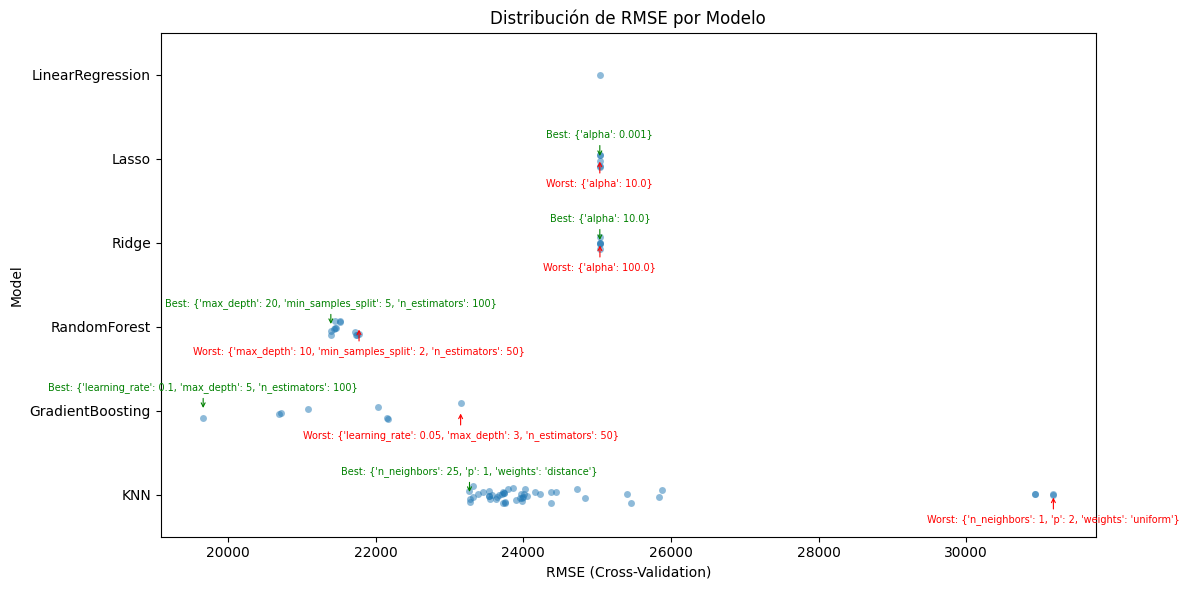

In [147]:
# Concatenar resultados de GridSearchCV
cv_scores_df = pd.concat(all_grid_results, ignore_index=True)

import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 6))

# Eliminamos el signo negativo del RMSE para interpretarlo correctamente
cv_scores_df["rmse"] = -cv_scores_df["mean_test_score"]

sns.stripplot(data=cv_scores_df, x="rmse", y="Model", jitter=True, alpha=0.5)
plt.xlabel("RMSE (Cross-Validation)")
plt.title("Distribución de RMSE por Modelo")

# Anotar mejores y peores hiperparámetros
for model in cv_scores_df["Model"].unique():

    # Omitir modelos sin parámetros
    if model == "LinearRegression":
        continue  # Omitir este modelo
    
    df_model = cv_scores_df[cv_scores_df["Model"] == model]
    best_row = df_model.loc[df_model["rmse"].idxmin()]  # Menor RMSE es mejor
    worst_row = df_model.loc[df_model["rmse"].idxmax()]

    # Best (flecha desde arriba)
    plt.annotate(
        f"Best: {best_row['params']}",
        xy=(best_row["rmse"], model),
        textcoords='offset points',
        xytext=(0, 15),
        ha='center',
        fontsize=7,
        color='green',
        arrowprops=dict(arrowstyle="->", color='green', lw=0.8)
    )

    # Worst (flecha desde abajo)
    plt.annotate(
        f"Worst: {worst_row['params']}",
        xy=(worst_row["rmse"], model),
        textcoords='offset points',
        xytext=(0, -20),
        ha='center',
        fontsize=7,
        color='red',
        arrowprops=dict(arrowstyle="->", color='red', lw=0.8)
    )

plt.tight_layout()
plt.show()


2. ¿Cuanto tiempo me voy a demorar en fabricar X cantidad de referencias en una maquina?

In [148]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LassoCV
from sklearn.preprocessing import StandardScaler, OrdinalEncoder
from sklearn.model_selection import train_test_split

# 1. Filtramos los datos
df_modelo = df_char[(df_char['estado'] == 'play') & (df_char['eficiencia_piezas_por_min'].notna())].copy()

# 2. Variables
features = ['referencia', 'maquina', 'seccion', 'proceso',
       'usuario',
       'fabricadas', 'hora_inicio',
       'dia_semana_inicio','turno']
X = df_modelo[features].copy()
y = df_modelo['duracion_min']

# 3. Codificación ordinal de variables categóricas
cat_features = ['turno', 'seccion', 'proceso','maquina','referencia','usuario','dia_semana_inicio']
encoder = OrdinalEncoder()
X[cat_features] = encoder.fit_transform(X[cat_features])

# 4. Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
# 5. Escalado
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 6. Modelo Lasso
lasso = LassoCV(cv=5, random_state=0)
lasso.fit(X_train_scaled, y_train)

# 7. Coeficientes
coef_df = pd.Series(lasso.coef_, index=features)
print("Coeficientes Lasso:")
print(coef_df)

# 8. Variables seleccionadas
selected_features = coef_df[coef_df != 0].index.tolist()
print("\nVariables seleccionadas por Lasso:")
print(selected_features)

# 9. Desempeño
print("\nR² en test:", lasso.score(X_test_scaled, y_test))


Coeficientes Lasso:
referencia            1.470491
maquina             -12.835990
seccion              -2.506944
proceso              10.966298
usuario              -3.018097
fabricadas           28.195308
hora_inicio          -1.676778
dia_semana_inicio    -0.139003
turno                -2.548017
dtype: float64

Variables seleccionadas por Lasso:
['referencia', 'maquina', 'seccion', 'proceso', 'usuario', 'fabricadas', 'hora_inicio', 'dia_semana_inicio', 'turno']

R² en test: 0.3202137962701027


In [149]:
#Seleccion de variables por significancia estadística

import statsmodels.api as sm
# Agregar constante para el modelo OLS
X_train_ols = sm.add_constant(X_train_scaled)
#Add headers to the DataFrame
X_train_ols = pd.DataFrame(X_train_ols, columns=['const'] + features)

# Ajustar el modelo OLS asegurando que los índices estén alineados
model = sm.OLS(y_train.reset_index(drop=True), X_train_ols)

result = model.fit()

# Resumen del modelo
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           duracion_min   R-squared:                       0.316
Model:                            OLS   Adj. R-squared:                  0.315
Method:                 Least Squares   F-statistic:                     346.3
Date:               vie, 30 may. 2025   Prob (F-statistic):               0.00
Time:                        20:27:10   Log-Likelihood:                -36109.
No. Observations:                6768   AIC:                         7.224e+04
Df Residuals:                    6758   BIC:                         7.231e+04
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                74.5250      0.611    122.001      0.000      73.327      75.722
referencia            1.6060      0.624      2.574      0.010       0.383       2.829
maquina             -12.5197      0.909    -13.768      0.000     -14.302     -10.737
seccion              -3.3232      1.078     -3.084      0.002      -5.436      -1.211
proceso              11.7805      1.095     10.763      0.000       9.635      13.926
usuario              -3.2750      0.615     -5.323      0.000      -4.481      -2.069
fabricadas           28.3750      0.624     45.464      0.000      27.152      29.599
hora_inicio          -1.8426      0.724     -2.545      0.011      -3.262      -0.424
dia_semana_inicio    -0.3479      0.611     -0.569      0.569      -1.547       0.851
turno                -2.6686      0.719     -3.711      0.000      -4.078      -1.259
==============================================================================
Omnibus:                     1412.831   Durbin-Watson:                   1.967
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2902.954
Skew:                           1.234   Prob(JB):                         0.00
Kurtosis:                       5.051   Cond. No.                         3.50
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [150]:
# 2. Variables
features = ['referencia', 'maquina', 'seccion', 'proceso', 'usuario', 'fabricadas', 'hora_inicio', 'dia_semana_inicio', 'turno']
X = df_modelo[features].copy()
y = df_modelo['duracion_min']

# 3. Codificación ordinal de variables categóricas sin turno
cat_features = ['seccion', 'proceso','maquina','referencia','usuario','dia_semana_inicio','turno']
encoder = OrdinalEncoder()
X[cat_features] = encoder.fit_transform(X[cat_features])

# 4. Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
# 5. Escalado
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [151]:
from sklearn.model_selection import GridSearchCV, cross_val_predict
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, root_mean_squared_error
import time
import pandas as pd

tuned_results = {}
all_grid_results = []

for name, config in models.items():
    print(f"Evaluando: {name}")
    start_time = time.time()

    # Entrenamiento con GridSearchCV
    grid = GridSearchCV(
        estimator=config["model"],
        param_grid=config["params"],
        cv=5,
        scoring="neg_root_mean_squared_error",
        n_jobs=-1
    )

    grid.fit(X_train_scaled, y_train)
    best_model = grid.best_estimator_
    end_time = time.time()
    training_time = end_time - start_time

    # Predicciones con validación cruzada
    y_pred = cross_val_predict(best_model, X_train_scaled, y_train, cv=5)

    tuned_results[name] = {
        "Model": best_model,
        "Best Params": grid.best_params_,
        "RMSE": root_mean_squared_error(y_train, y_pred),
        "MAE": mean_absolute_error(y_train, y_pred),
        "R2 Score": r2_score(y_train, y_pred),
        "Training Time (s)": training_time
    }

    print(tuned_results[name])
    print("\n" + "="*50 + "\n")

    # Guardamos todos los resultados del grid
    grid_df = pd.DataFrame(grid.cv_results_)
    grid_df["Model"] = name
    all_grid_results.append(grid_df)

# Tabla con métricas de resumen (sin perder los modelos)
tuned_metrics = pd.DataFrame({
    model_name: {k: v for k, v in result.items() if k != "Model"}
    for model_name, result in tuned_results.items()
}).T


Evaluando: LinearRegression
{'Model': LinearRegression(), 'Best Params': {}, 'RMSE': 50.32899908725294, 'MAE': 37.694013304484116, 'R2 Score': 0.312529964102935, 'Training Time (s)': 0.03299880027770996}


Evaluando: Lasso
{'Model': Lasso(alpha=0.1), 'Best Params': {'alpha': 0.1}, 'RMSE': 50.32548666044805, 'MAE': 37.686438512006696, 'R2 Score': 0.31262591689220987, 'Training Time (s)': 0.06954097747802734}


Evaluando: Ridge
{'Model': Ridge(alpha=10.0), 'Best Params': {'alpha': 10.0}, 'RMSE': 50.32883091692123, 'MAE': 37.69441767863883, 'R2 Score': 0.31253455834772115, 'Training Time (s)': 0.059525251388549805}


Evaluando: RandomForest
{'Model': RandomForestRegressor(min_samples_split=5, random_state=42), 'Best Params': {'max_depth': None, 'min_samples_split': 5, 'n_estimators': 100}, 'RMSE': 40.936288244695035, 'MAE': 29.681355633772334, 'R2 Score': 0.5451857003898386, 'Training Time (s)': 11.202979326248169}


Evaluando: GradientBoosting
{'Model': GradientBoostingRegressor(max_dept

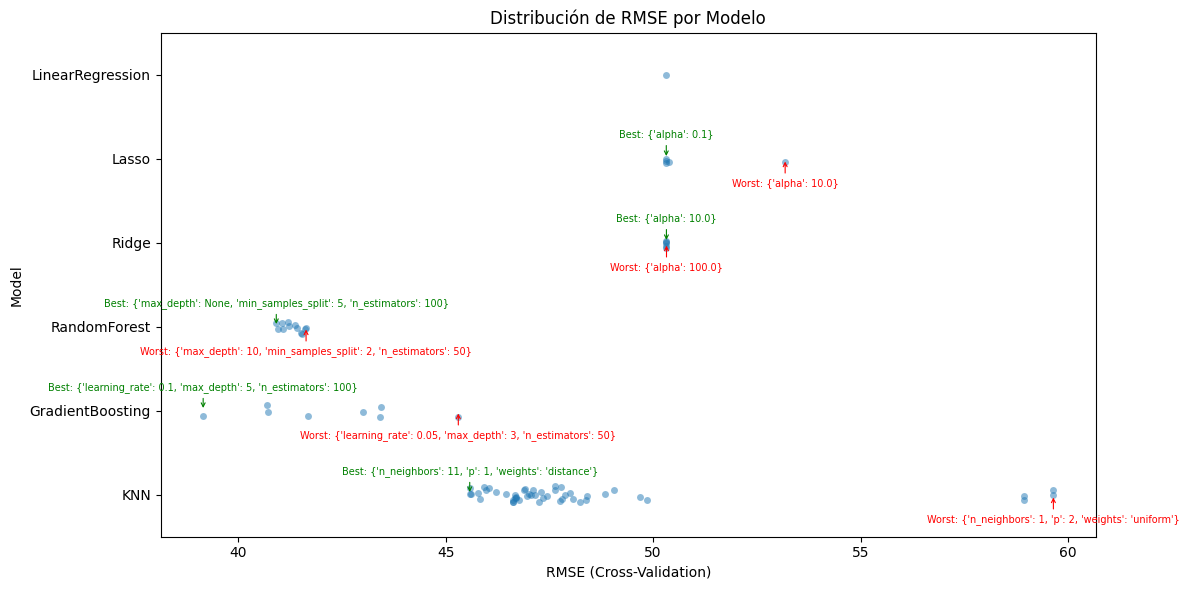

In [152]:
# Concatenar resultados de GridSearchCV
cv_scores_df = pd.concat(all_grid_results, ignore_index=True)

import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 6))

# Eliminamos el signo negativo del RMSE para interpretarlo correctamente
cv_scores_df["rmse"] = -cv_scores_df["mean_test_score"]

sns.stripplot(data=cv_scores_df, x="rmse", y="Model", jitter=True, alpha=0.5)
plt.xlabel("RMSE (Cross-Validation)")
plt.title("Distribución de RMSE por Modelo")

# Anotar mejores y peores hiperparámetros
for model in cv_scores_df["Model"].unique():

    # Omitir modelos sin parámetros
    if model == "LinearRegression":
        continue  # Omitir este modelo
    
    df_model = cv_scores_df[cv_scores_df["Model"] == model]
    best_row = df_model.loc[df_model["rmse"].idxmin()]  # Menor RMSE es mejor
    worst_row = df_model.loc[df_model["rmse"].idxmax()]

    # Best (flecha desde arriba)
    plt.annotate(
        f"Best: {best_row['params']}",
        xy=(best_row["rmse"], model),
        textcoords='offset points',
        xytext=(0, 15),
        ha='center',
        fontsize=7,
        color='green',
        arrowprops=dict(arrowstyle="->", color='green', lw=0.8)
    )

    # Worst (flecha desde abajo)
    plt.annotate(
        f"Worst: {worst_row['params']}",
        xy=(worst_row["rmse"], model),
        textcoords='offset points',
        xytext=(0, -20),
        ha='center',
        fontsize=7,
        color='red',
        arrowprops=dict(arrowstyle="->", color='red', lw=0.8)
    )

plt.tight_layout()
plt.show()


3. Modelo de clasificación: Predecir si una orden será productiva o no
    - Identificar qué combinaciones de proceso/turno/usuario/duración/maquina generan alta eficiencia

In [207]:
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import OrdinalEncoder, StandardScaler
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import classification_report, accuracy_score

# Variable objetivo y eliminación de columnas irrelevantes
y = df_char['estado']
X = df_char.drop(columns=[
    'estado', 'eficiencia_piezas_por_min', 'duracion_min', 'duracion_sec',
    'fabricadas','fecha_inicio', 'fecha_fin', 'dia_inicio', 'dia_fin',
    'hora_inicio', 'hora_fin', 'dia_semana_fin',
    'promedio_duracion_proceso_play', 'duracion_vs_proceso', 'proceso'
])

# Codificación de variables categóricas
cat_features = ['referencia', 'maquina', 'seccion', 'usuario', 'dia_semana_inicio', 'turno']
encoder = OrdinalEncoder()
X[cat_features] = encoder.fit_transform(X[cat_features])

# Separación de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Escalado
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Modelo
model = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)

# Cross-validation
cross_val_scores = cross_val_score(model, X_train_scaled, y_train, cv=5, scoring='accuracy')
print("Cross-validation scores:", cross_val_scores)

# Entrenamiento y predicción
model.fit(X_train_scaled, y_train)
y_pred = model.predict(X_test_scaled)

# Evaluación
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))


Cross-validation scores: [0.67282683 0.65982204 0.66358658 0.67374187 0.66347141]
Accuracy: 0.6671229126745141
Classification Report:
               precision    recall  f1-score   support

        play       0.78      0.39      0.52      1695
        stop       0.63      0.91      0.74      1958

    accuracy                           0.67      3653
   macro avg       0.71      0.65      0.63      3653
weighted avg       0.70      0.67      0.64      3653



4. Clusterización no supervisada: Agrupar tipos de comportamientos
    - Descubrir grupos de trabajo similares (por ejemplo, cuellos de botella , operarios veloces, etc.)

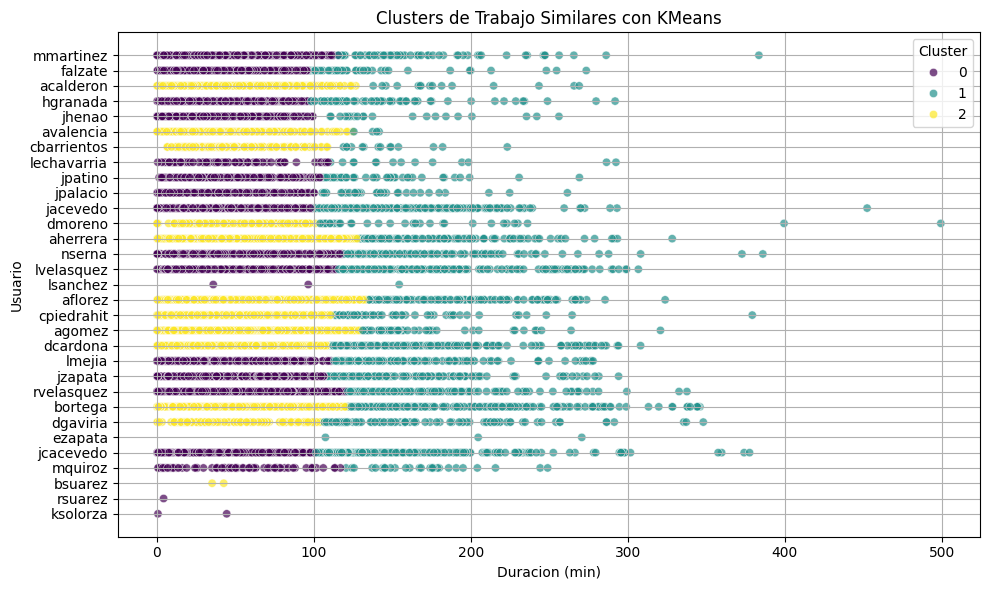

In [190]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler, OrdinalEncoder
import matplotlib.pyplot as plt
import seaborn as sns

# Codificar el usuario
encoder = OrdinalEncoder()
df_char['usuario_encoded'] = encoder.fit_transform(df_char[['usuario']])

# Preparar las características para clustering
features_clustering = ['duracion_min', 'usuario_encoded']
X_clustering = df_char[features_clustering].copy()

# Escalar los datos
scaler_clustering = StandardScaler()
X_clustering_scaled = scaler_clustering.fit_transform(X_clustering)

# Aplicar KMeans
kmeans = KMeans(n_clusters=3, random_state=42)
df_char['kmeans_cluster'] = kmeans.fit_predict(X_clustering_scaled)

# Visualización
plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=df_char,
    x='duracion_min',
    y='usuario',
    hue='kmeans_cluster',
    palette='viridis',
    alpha=0.7
)
plt.title('Clusters de Trabajo Similares con KMeans')
plt.xlabel('Duracion (min)')
plt.ylabel('Usuario')
plt.legend(title='Cluster')
plt.grid(True)
plt.tight_layout()
plt.show()


Index(['duracion_min', 'usuario_encoded'], dtype='object')


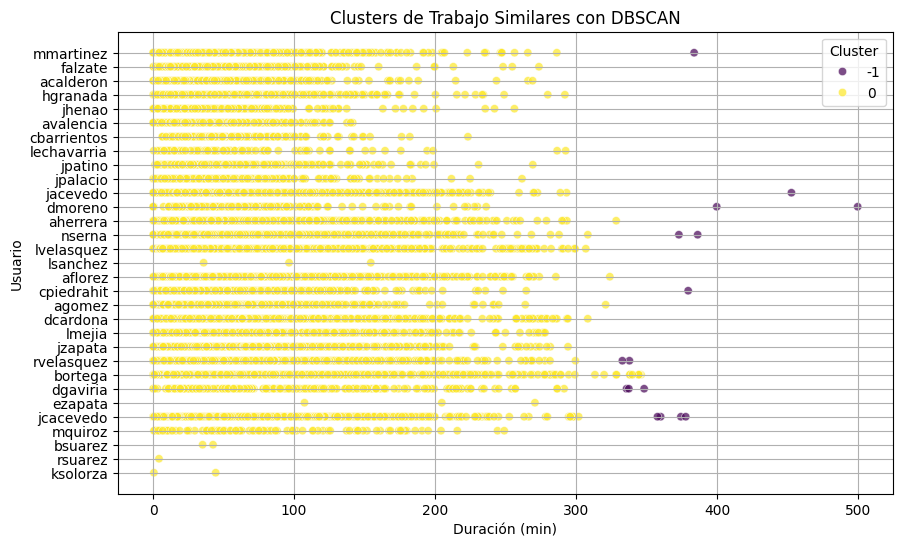

Registros en el cluster 0:
     usuario  duracion_min  eficiencia_piezas_por_min  fabricadas estado
0  mmartinez         61.63                   0.016226         1.0   play
1  mmartinez        154.77                 147.056923     22760.0   play
2  mmartinez         46.38                 153.945666      7140.0   play
3    falzate        199.90                 215.107554     43000.0   play
4    falzate         60.18                 345.629777     20800.0   play
5  acalderon         49.98                 150.860344      7540.0   play
6  mmartinez         43.43                 105.457057      4580.0   play
7    falzate        102.50                 439.219512     45020.0   play
8  acalderon        188.03                 269.744190     50720.0   play
9  acalderon         16.93                 398.700532      6750.0   play
Registros en el cluster -1:
          usuario  duracion_min  eficiencia_piezas_por_min  fabricadas estado
5357     dgaviria        348.12                 114.902907     4

In [205]:
#Utilizando ahora high density clustering para encontrar grupos de trabajo similares
from sklearn.cluster import DBSCAN
# Seleccionar características numéricas para clustering
features_clustering = ['duracion_min']
#Utilizar un encoder para convertir los usuarios a números
encoder = OrdinalEncoder()
df_char['usuario_encoded'] = encoder.fit_transform(df_char[['usuario']])
features_clustering.append('usuario_encoded')

X_clustering = df_char[features_clustering].copy()
print(X_clustering.columns)
# Escalar las características
scaler_clustering = StandardScaler()
X_clustering_scaled = scaler_clustering.fit_transform(X_clustering)
# Entrenar el modelo DBSCAN
dbscan = DBSCAN(eps=0.5, min_samples=5)  # Ajustar eps y min_samples según sea necesario
dbscan.fit(X_clustering_scaled)
# Agregar las etiquetas de cluster al DataFrame original
df_char['dbscan_cluster'] = dbscan.labels_
# Visualizar los clusters usando el nombre de usuario original
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_char, x='duracion_min', y='usuario', hue='dbscan_cluster', palette='viridis', alpha=0.7)
plt.title('Clusters de Trabajo Similares con DBSCAN')
plt.xlabel('Duración (min)')
plt.ylabel('Usuario')
plt.legend(title='Cluster')
plt.grid()
plt.show()

#Ver los registros que pertenecen a un cluster específico
cluster_id = 0  # Cambia este valor al ID del cluster que deseas explorar
cluster_data = df_char[df_char['dbscan_cluster'] == cluster_id]
print(f"Registros en el cluster {cluster_id}:")
print(cluster_data[['usuario', 'duracion_min', 'eficiencia_piezas_por_min','fabricadas','estado']].head(10))

cluster_id = -1  # Cambia este valor al ID del cluster que deseas explorar
cluster_data = df_char[df_char['dbscan_cluster'] == cluster_id]
print(f"Registros en el cluster {cluster_id}:")
print(cluster_data[['usuario', 'duracion_min', 'eficiencia_piezas_por_min','fabricadas','estado']].head(10))